# Sprint7課題 機械学習スクラッチクラスタリング

## 2.スクラッチによる実装
## 【問題1】K-meansクラスの作成
非階層クラスタリングの手法であるK-meansのクラスを作成してください。名前はScratchKMeansとしてください。

教師なし学習であるクラスタリングになるため、ここまでの回帰や分類とは異なるパイプラインを作成することになります。

メソッドやパラメータなどはscikit-learnを参考にしてください。

[sklearn.cluster.KMeans — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

### クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しました。スクラッチの過程で利用してください。

このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

**シンプルデータセット3**
```
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

```




In [1]:
#ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np
import collections
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

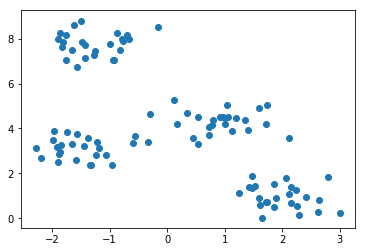

In [3]:
#可視化してみる
plt.scatter(X[:, 0], X[:, 1])

In [4]:
#学習データの中からランダムに中心点を設定（クラスタ数は4とする）
k = 4

center_point = X[np.random.choice(X.shape[0], k, replace=False)]

center_point

array([[-1.61803727,  8.60696731],
       [-1.64996061,  7.49068513],
       [-1.26041884,  7.46644456],
       [-1.89468423,  7.96898545]])

In [5]:
#どのクラスタに属するかを格納する配列(ALL0)
cluster = np.zeros(X.shape[0])

In [6]:
#１番目の学習データと中心点との距離
distance = np.sum((X[0] - center_point) ** 2, axis=1)

distance

array([29.41677945, 19.88817074, 18.01030437, 24.95051213])

In [7]:
#最も距離が短い中心点のクラスタ
cluster[0] = np.where(distance==np.min(distance))[0][0]

cluster

array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
#i番目のデータに対してクラスタを決める
for n_samples in range(X.shape[0]):
    #i番目の学習データとそれぞれの中心点の距離を測る
    distance = np.sum((X[n_samples] - center_point) ** 2, axis=1)
    
    #距離が最も小さいクラスタの番号を更新する
    cluster[n_samples] = np.where(distance==np.min(distance))[0][0]
    
cluster

array([2., 3., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 1., 2., 2., 1., 1., 1., 3., 2., 1., 2., 2., 2.,
       2., 2., 1., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 3., 1., 2., 2., 2.])

In [9]:
#重心を更新する
for n_cluster in range(k):
    center_point[n_cluster] = np.mean(X[np.where(cluster==n_cluster)], axis=0)
center_point

array([[-1.03607689,  8.53953236],
       [-1.85355555,  4.56532575],
       [ 0.56524166,  3.49844888],
       [-1.8303706 ,  8.0661067 ]])

### 関数にまとめていく

In [10]:
def KMeans(X, n_cluster=8, max_iter=30, tol=1e-4):
    
    #どのクラスタに属するかを格納する配列(ALL0)
    cluster = np.zeros(X.shape[0])

    #どのクラスタに属するかを一時的に格納する配列(ALL0)
    cluster_tmp = np.zeros(X.shape[0])
    
    #中心点の初期化
    center_point = X[np.random.choice(X.shape[0], n_cluster, replace=False)]
    
    #重心の初期化
    center_point_tmp = center_point.copy()

    #指定の回数を繰り返す
    for i in range(max_iter):
        
        #i番目のデータに対してクラスタを決める
        for n_samples in range(X.shape[0]):
            #i番目の学習データとそれぞれの中心点の距離を測る
            distance = np.sum((X[n_samples] - center_point) ** 2, axis=1)

            #距離が最も小さいクラスタの番号を更新する
            cluster[n_samples] = np.where(distance==np.min(distance))[0][0]

        #重心を更新する
        for k in range(n_cluster):
            center_point[k] = np.mean(X[np.where(cluster==k)], axis=0)
        
        print(abs(np.sum(center_point) - np.sum(center_point_tmp)))
        #中心点と重心の差が指定した許容値以下になった場合、処理を終了
        if abs(np.sum(center_point) - np.sum(center_point_tmp)) <= tol or (cluster == cluster_tmp).all():
            print("break")
            break
        #処理継続の場合、一時配列にその時点のデータを渡す
        else:
            center_point_tmp = center_point.copy()
            cluster_tmp = cluster.copy()

            
    return  cluster, center_point

In [11]:
#クラスターと中心点を確認
clusters, center_point = KMeans(X=X, n_cluster=8, max_iter=30)

clusters

3.065809346410269
0.878363754729186
0.5418675404566997
0.13246650858621223
0.0
break


array([0., 6., 0., 0., 0., 0., 1., 4., 0., 5., 5., 5., 5., 4., 4., 2., 2.,
       1., 3., 2., 0., 5., 3., 2., 0., 3., 1., 0., 2., 2., 2., 5., 2., 2.,
       1., 0., 6., 2., 7., 3., 0., 1., 5., 3., 3., 6., 2., 3., 0., 0., 0.,
       2., 1., 1., 1., 5., 7., 2., 2., 4., 5., 2., 2., 0., 2., 7., 3., 3.,
       2., 0., 6., 2., 0., 6., 0., 0., 1., 1., 2., 2., 2., 6., 1., 0., 2.,
       1., 2., 2., 0., 0., 0., 3., 0., 1., 3., 6., 5., 1., 4., 0.])

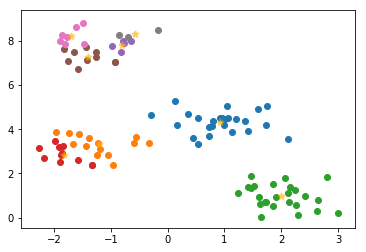

In [12]:
#散布図の確認
for i in range(8):
    plt.scatter(X[np.where(clusters==i)[0]][:, 0], X[np.where(clusters==i)[0]][:, 1])
    plt.show    
    
plt.scatter(center_point[:,0], center_point[:,1], c="yellow", marker="*", alpha=0.5,linewidths="2", edgecolors="orange")

### クラスにまとめる

In [13]:
#ライブラリのインポート
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import cm


class ScratchKMeans():
    """
    クラスタリングのスクラッチ実装

    Parameters
    ----------
    n_init : int(default : 10)
        初期値を変えた繰り返し回数
    n_cluster : int(default : 8)
        クラスターの数
    max_iter : int(default : 30)
        中心点を更新する繰り返し回数
    tol : float(default : 1e-4)
        中心点と重心の差の許容値

    Attributes
    ----------
    self.center_point : 次の形のndarray, shape(n_cluster, n_features)
        クラスタ毎の中心点
    self.cluster : 次の形のndarray, shape(n_samples, 1)
        サンプル毎のクラスタ識別値
    self.SSE : float
        クラスタ内平方誤差和

    """

    def __init__(self,n_init=10, n_cluster=8, max_iter=30, tol=1e-4):
        # ハイパーパラメータを属性として記録
        self.n_init = n_init
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.tol = tol
        
        
    def fit(self, X):
        """
        クラスタリングの学習をする。
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
            
        Returns
        -------
        self : returns an instance of self.            
            
        """
        #pandasをnp.arrayに変換
        X = np.array(X)
        
        #SSEの最小値を初期化
        self.SSE = None
        
         #初期値を変えて繰り返す
        for init in range(self.n_init):
        
            #どのクラスタに属するかを格納する配列(ALL0)
            cluster = np.zeros(X.shape[0])

            #どのクラスタに属するかを一時的に格納する配列(ALL0)
            cluster_tmp = np.zeros(X.shape[0])

            #中心点の初期化
            center_point = X[np.random.choice(X.shape[0], self.n_cluster, replace=False)]

            #重心の初期化
            center_point_tmp = center_point.copy()

            #指定の回数を中心地の更新を繰り返す
            for i in range(self.max_iter):

                #i番目のデータに対してクラスタを決める
                for n_samples in range(X.shape[0]):
                    #i番目の学習データとそれぞれの中心点の距離を測る
                    distance = np.sum((X[n_samples] - center_point) ** 2, axis=1)

                    #距離が最も小さいクラスタの番号を更新する
                    cluster[n_samples] = np.where(distance==np.min(distance))[0][0]

                #重心を更新する
                for k in range(self.n_cluster):
                    center_point[k] = np.mean(X[np.where(cluster==k)], axis=0)
                    
                 
                '''
                k番目のクラスタに割り当てられるデータ点 Xn が存在しない場合、
                中心点μkを最も離れているデータ点の場所に移動する。
                '''
                #指定したクラスターの数を並べたリスト
                cluster_list = np.arange(0, self.n_cluster, 1)

                #分類した後のクラスターのユニーク値
                unique_cluster = np.unique(cluster)

                #k番目のクラスタに割り当てられるデータ点が存在しないクラスタ番号
                #setdiff1d : 1番目の引数の配列の各要素から、2番目の引数の配列に含まれる要素を除外した要素を返す。
                noexist_cluster = np.setdiff1d(cluster_list,unique_cluster)

                #データ点が存在しないクラスタ番号がある場合中心点を最も離れているデータ点の場所に移動する。
                if len(noexist_cluster) > 0:

                    for i in noexist_cluster:
                        #データが存在しない中心点とデータ点の距離が最も大きいインデックス
                        far_distance_idx = np.argmax(np.sum((X - center_point[i]) ** 2, axis=1))

                        #最も離れているデータ点の場所をcenter_pointに更新する
                        center_point[i] = X[far_distance_idx]
                        

                #中心点と重心の差が指定した許容値以下になった場合、処理を終了
                if abs(np.sum(center_point) - np.sum(center_point_tmp)) <= self.tol or (cluster == cluster_tmp).all():
                    break

                #処理継続の場合、一時配列にその時点のデータを渡す
                else:
                    center_point_tmp = center_point.copy()
                    cluster_tmp = cluster.copy()

            #SSEの算出を行う
            sse = self.sum_of_squared_errors(X, center_point, cluster)
            
             #初回のSSE算出の場合、min_sseを算出する
            if self.SSE is None:
                self.SSE = sse

            #ここまでの一番小さいsse以下だった場合、中心点とクラスターを更新する
            if sse <= self.SSE:
                self.center_point = center_point.copy()
                self.cluster = cluster.copy()
                self.SSE = sse
            
    

    def predict(self, X):
        """
        クラスタリングを使い分類予測する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            予測分類したクラスター
        """
        
        pred_cluster = np.zeros(X.shape[0])
        
        #i番目のデータに対してクラスタを決める
        for n_samples in range(X.shape[0]):
            #i番目の学習データとそれぞれの中心点の距離を測る
            distance = np.sum((X[n_samples] - self.center_point) ** 2, axis=1)

            #距離が最も小さいクラスタの番号を更新する
            pred_cluster[n_samples] = np.where(distance==np.min(distance))[0][0]
            
        return pred_cluster

    
    def sum_of_squared_errors(self, X, center_point, cluster):
        """
        クラスタ内誤差平方和（SSE, Sum of Squared Errors）を算出する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        center_point : 次の形のndarray, shape(n_cluster, n_features)
            クラスタ毎の中心点
        cluster : 次の形のndarray, shape(n_samples, 1)
            サンプル毎のクラスタ識別値
        
        Returns
        -------
        sse : flaot
            クラスタ内誤差平方和を返す
                
        """

        sse = 0
        for i in range(X.shape[0]):
            sse += np.sum((X[i] - center_point[int(cluster[i])]) ** 2)

        return sse
        
    def plot_scatter(self, X):
        """
        クラスタ別の散布図を出力する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        
        Returns
        -------
        plot.scatter
            クラスタ別の散布図
                
        """
        for i in range(self.n_cluster):
            plt.scatter(X[np.where(self.cluster==i)[0]][:, 0], X[np.where(self.cluster==i)[0]][:, 1], label=i+1)

        plt.scatter(self.center_point[:,0], self.center_point[:,1], c="black", marker="*", label='center_point')
        plt.title('Scatter Plot of KMeans')
        plt.xlabel('f0')
        plt.ylabel('f1')
        plt.legend()
        plt.show

        
        

    def degree_of_aggregation(self, X):
        """
        凝集度を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        
        Returns
        -------
        aggregation : nadarray, shape(n_samples, )
            凝集度
                
        """
        #凝集度の初期化
        aggregation = np.zeros([X.shape[0],])

        #クラスターの数だけ繰り返す
        for j in range(self.n_cluster):
            #クラスターが一致するデータのみを抽出
            X_same_cluster = X[np.where(self.cluster==j)[0]]

            #一時的に凝集度を格納するリスト
            aggregation_i = np.array([])

            #クラスターが一致するデータの数だけ繰り返す
            for i in range(X_same_cluster.shape[0]):
                #データ毎に凝集度を計算する
                aggregation_i = np.append(aggregation_i, np.mean(np.linalg.norm(X_same_cluster[i] - X_same_cluster, ord=2, axis=1)))

            #クラスタ別に計算した凝集度を配列に格納する
            aggregation[np.where(self.cluster==j)] = aggregation_i

        return aggregation

    
    def degree_of_divergence(self, X):
        """
        乖離度を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        
        Returns
        -------
        divergence : nadarray, shape(n_samples, )
            乖離度
                
        """
        #乖離度の初期化
        divergence = np.array([])

        for i in range(X.shape[0]):
            #最も近いクラスタがどこか判定する
            near_cluster = np.argsort(np.linalg.norm(X[i] - self.center_point, ord=2, axis=1))[1]

            #最も近いクラスタに属するデータのリストを作成する
            X_near_cluster = X[np.where(self.cluster==near_cluster)[0]]

            #最も近いクラスタに属するデータと距離の平均を配列に加える
            divergence = np.append(divergence, np.mean(np.linalg.norm(X[i] - X_near_cluster, ord=2, axis=1)))

        return divergence
    

    def plot_silhouette(self, X):
        """
        シルエット図を出力する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        
        Returns
        -------
        plot
            シルエット図
                
        """
        
        #凝集度を計算する
        an = self.degree_of_aggregation(X)
        
        #乖離度を計算する
        bn = self.degree_of_divergence(X)
        
        #凝集度と乖離度を列で結合
        an_bn = np.concatenate([an.reshape(an.shape[0],1), bn.reshape(bn.shape[0],1)], axis=1)

        #各データのシルエット係数
        silhouette_vals = (bn - an) / np.max(an_bn, axis=1)

        #シルエット係数の平均値
        silhouette_avg = np.mean(silhouette_vals)

        #各データ点のクラスララベル名
        y_km = self.cluster

        #クラスタのラベル名のリスト
        cluster_labels = np.arange(0, self.n_cluster, 1)

        #クラスタ数
        n_clusters = self.n_cluster
        
        
        #シルエット図を出力する
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(i / n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
            yticks.append((y_ax_lower + y_ax_upper) / 2)
            y_ax_lower += len(c_silhouette_vals)

        plt.axvline(silhouette_avg, color="red", linestyle="--")
        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Silhouette coefficient')
        plt.show()
        

        

In [14]:
#インスタンス生成
skm = ScratchKMeans(n_cluster=4, max_iter=30)

#データをもとにモデル作成
skm.fit(X)

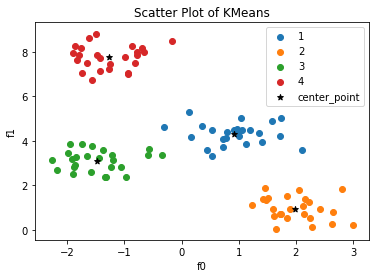

In [15]:
#散布図を表示
skm.plot_scatter(X)

### 推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。

- データ点 $X_n$ に対し、学習で決まった中心点 $\mu_k$の元、 $J$ を最小化する $r_{nk}$ を選ぶ。  

具体的には次のことです。

- データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。

In [16]:
#推定する
skm.predict(X)

array([0., 3., 0., 0., 0., 0., 2., 3., 0., 3., 3., 3., 3., 3., 3., 1., 1.,
       2., 2., 1., 0., 3., 2., 1., 0., 2., 2., 0., 1., 1., 1., 3., 1., 1.,
       2., 0., 3., 1., 3., 2., 0., 2., 3., 2., 2., 3., 1., 2., 0., 0., 0.,
       1., 2., 2., 2., 3., 3., 1., 1., 3., 3., 1., 1., 0., 1., 3., 2., 2.,
       1., 0., 3., 1., 0., 3., 0., 0., 2., 2., 1., 1., 1., 3., 2., 0., 1.,
       2., 1., 1., 0., 0., 0., 2., 0., 2., 2., 3., 3., 2., 3., 0.])

## 【問題2】エルボー法の実装
K-meansにおいて中心点の個数$k$は人為的に決める必要があるが、その判断方法としてエルボー法があります。

SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。

このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

In [17]:
#SSEを取得確認
skm.SSE

48.633783207064035

In [18]:
#クラスタ数別のSSEを取得する
sse_list = np.array([])

for i in range(30):
    skm_i = ScratchKMeans(n_cluster=i+1,n_init=10, max_iter=30, tol=1e-4)
    skm_i.fit(X)
    sse_list = np.append(sse_list, skm_i.SSE)
    
sse_list

/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


array([870.26117979, 351.48372865, 139.17097772,  48.63378321,
        43.39904506,  38.15710795,  34.16413884,  29.72639418,
        28.80427289,  24.90417867,  21.89887643,  21.25848425,
        18.30863182,  16.48488717,  15.4627912 ,  14.96837986,
        12.68222753,  10.82844676,  11.05367331,  11.12886791,
         9.87707896,   9.73332257,   8.48842291,   8.65501949,
         7.93923856,   7.41347759,   6.94445651,   6.44193889,
         6.301778  ,   5.69718543])

<function matplotlib.pyplot.show(*args, **kw)>

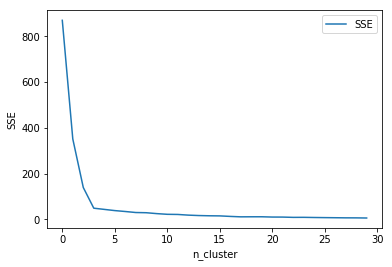

In [19]:
#グラフを表示する
plt.plot(sse_list, label='SSE')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.legend()

plt.show

## 【問題3】（アドバンス課題）シルエット図
### コーディング

$k$を決める助けになるものとしてシルエット図もあります。

Matplotlibを使い可視化するコードは用意しました。以下を与えてくあさい。

**silhouette_vals** : shape(n_samples,)のndarray、各データ点のシルエット係数

**silhouette_avg** : float、シルエット係数の平均値

**y_km** : shape(n_samples,)のndarray、各データ点のクラスタラベル名

**cluster_labels** : list、クラスタのラベル名のリスト

**n_clusters** : int、クラスタ数

$n$番目のデータ点に対するシルエット係数 $s_n$ は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_n = \frac{b_n-a_n}{max(b_n,a_n)}
$$

$a_n$: 凝集度。同じクラスタ内の他のデータ点との距離の平均値。

$b_n$: 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。

乖離度 $b$ が大きく、凝集度 $a$が小さい時が理想的であり、シルエット係数 $s$は1に近くなります。

**シルエット図を表示するためのコード**

```
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
```

In [20]:
#凝集度を計算する
aggregation = skm.degree_of_aggregation(X)
aggregation

array([0.86892177, 0.85686625, 0.73270957, 0.63112458, 1.03266152,
       0.65220525, 1.01383879, 0.77245469, 1.34869556, 0.6499461 ,
       0.95993895, 0.98507088, 0.76272397, 0.68601614, 0.78819447,
       1.32667943, 1.13238967, 1.26281017, 0.69823232, 1.05458604,
       1.48230665, 0.80371773, 0.70014647, 1.0189369 , 0.74462901,
       0.77240394, 1.16909096, 0.62642453, 1.31024849, 0.8872611 ,
       0.67940875, 0.95233017, 0.67642456, 0.98132573, 0.71002887,
       0.77930845, 1.17769867, 0.78707403, 1.40660527, 0.89784358,
       0.92642011, 0.62908438, 1.1711659 , 0.80747159, 0.7259423 ,
       0.93771792, 0.759637  , 0.68024849, 0.68684732, 1.20575545,
       0.89736541, 0.62076451, 0.71217582, 0.92164432, 1.0386175 ,
       0.67886121, 0.8539969 , 0.74572404, 0.71456973, 0.85677807,
       0.83012239, 0.82549793, 0.64741453, 1.19800173, 0.85712411,
       0.88492296, 0.95617254, 0.91293446, 0.74676168, 0.67016791,
       0.85234527, 0.81572516, 0.62712693, 0.6652742 , 0.62826

In [21]:
#乖離度を計算する
divergence = skm.degree_of_divergence(X)
divergence

array([2.32394859, 4.63529661, 3.1314107 , 2.91850671, 3.58269778,
       2.5287344 , 2.96047682, 3.97415104, 2.73533895, 4.16145937,
       3.3161174 , 3.85877231, 3.691911  , 3.95638979, 3.66872583,
       4.62363707, 2.57291787, 1.66023933, 3.15999146, 4.41835833,
       2.65567057, 4.31664926, 3.09968168, 4.44278111, 2.48015748,
       3.09169475, 1.71905399, 2.64852369, 3.14899652, 3.94938207,
       3.73215363, 3.32634165, 3.86389117, 2.82696263, 2.40202663,
       2.75764995, 5.11533244, 3.01296959, 4.35263221, 3.40100156,
       3.20435372, 2.65892854, 3.49610031, 3.07217284, 3.20998425,
       4.84643773, 3.81913718, 3.01338354, 2.44643652, 2.07307671,
       2.45996438, 3.57612156, 2.69187658, 2.75919933, 2.7649464 ,
       3.86077643, 4.34236014, 3.71702815, 3.38201915, 4.02925121,
       3.70752652, 3.00934746, 3.48046169, 3.77929076, 3.03268947,
       4.20079677, 3.5531758 , 3.02998321, 3.23097185, 3.03456192,
       4.72561571, 3.0747648 , 2.81541206, 4.29086615, 2.74650

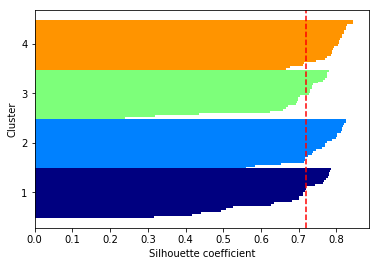

In [22]:
#シルエットずを出力する
skm.plot_silhouette(X)

### シルエット図の見方
- クラスターの「シルエット係数 silhouette coefficient 」が 1に近いほど、そのクラスターは他のクラスターから遠く離れていることを表す（係数は -1 ~ 1の間をとる）
    - 0に近いほど隣接するクラスターと接近している or 隣接するクラスターと重なっていることを表す（上手くクラスターの分離ができていない状態）
    - 係数がマイナス値だとクラスター化されたサンプルは間違ったクラスターに所属している可能性がある

- シルエットの"厚さ thickness"はクラスターのサイズ（所属するサンプル数）を表す
    - 適切にクラスター分離できていれば各クラスターのシルエットの"厚さ"は均等に近くなるらしい
    
https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2

### pyファイルで確認

In [23]:
#pyファイル格納ディレクトリのパス設定
import sys
sys.path.append("/Users/yusuke-saruya/diveintocode-ml/full-time/diveintocode-term1/ml-scratch/utils/")
import classify_pipeline

In [24]:
#インスタンス生成
cl_skm = classify_pipeline.ScratchKMeans(n_cluster=4)
cl_skm.fit(X)

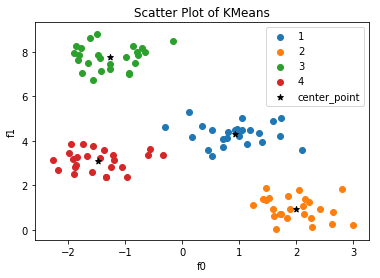

In [25]:
cl_skm.plot_scatter(X)

## 3.クラスタリング分析

### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。

[UCI Machine Learning Repository: Wholesale customers Data Set](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)

Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください

**PCAのサンプルコード**
```
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

```

**PCAの分散説明率を表示するコードサンプル**

```
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()
```

In [26]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [27]:
#Cannnel,Regionは取り除く
data = df.iloc[:, 2:8]
data = np.log(data)

In [28]:
 #PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


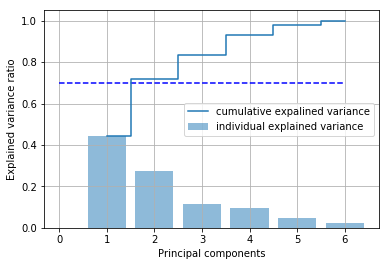

In [29]:
#PCAの分散説明率を表示する
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題4】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

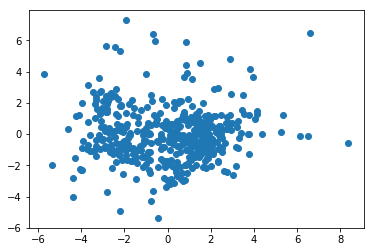

In [30]:
#散布図の表示
plt.scatter(data_pca[:, 0], data_pca[:,1])

In [31]:
#エルボー法によりクラスタ別のSSEを取得する
sse_list2 = np.array([])

for i in range(30):
    skm2_i = ScratchKMeans(n_cluster=i+1,n_init=10, max_iter=30, tol=1e-4)
    skm2_i.fit(data_pca)
    sse_list2 = np.append(sse_list2, skm2_i.SSE)
    
sse_list2

array([3451.59780634, 1968.48882046, 1460.26365403, 1153.37966256,
        969.43246356,  803.71901663,  681.4314322 ,  607.92514648,
        540.96235516,  479.16053897,  447.01962685,  406.71277526,
        370.92443158,  343.29976481,  323.04192454,  313.69189795,
        281.71940173,  273.64556943,  258.45737123,  229.61568623,
        236.48652932,  214.60050646,  206.59030257,  207.40375435,
        199.024684  ,  193.52615351,  179.79561289,  174.03441098,
        164.12180662,  165.75133075])

<function matplotlib.pyplot.show(*args, **kw)>

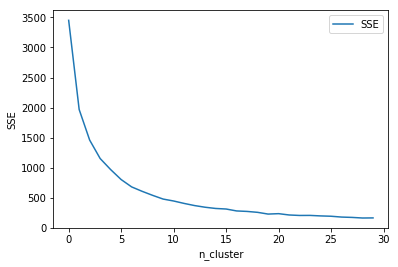

In [32]:
#グラフを表示する
plt.plot(sse_list2, label='SSE')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.legend()

plt.show

In [33]:
#インスタンス生成
skm_4 = ScratchKMeans(n_cluster=4, max_iter=30)

#データをもとにモデル作成
skm_4.fit(data_pca)

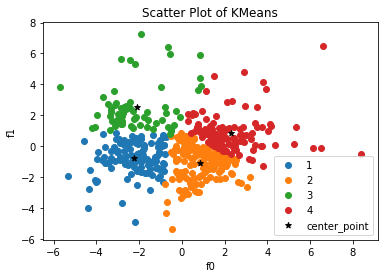

In [34]:
 #n_cluster=4にてプロット
skm_4.plot_scatter(data_pca)

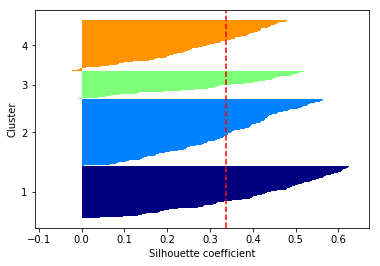

In [35]:
 #n_cluster=5にてシルエットずを表示
skm_4.plot_silhouette(data_pca)

### クラスタ数kについて
クラスタ数kは4が最適だと考える。理由としては、
- 一部のクラスターのデータ数に偏りはあるものの、これ以上クラスタを細かくすることによる説明上の分類ができない可能性がある。
- 上記散布図として、下記のとおり大まかな特徴量を分けることができると考える
    - f0 < 0, f1 < 0 →クラスタ1
    - f0 > 0, f1 < 0 →クラスタ2
    - f0 > 0, f1 > 0 →クラスタ3
    - f0 < 0, f1 > 0 →クラスタ4


## 【問題5】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

In [36]:
#Channel列の抽出
channel = np.array(df)[:,0]

#Region列の抽出
region = np.array(df)[:,1]

<function matplotlib.pyplot.show(*args, **kw)>

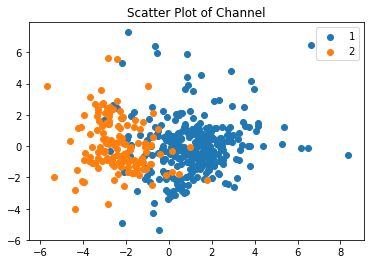

In [37]:
for i in np.unique(channel):
    plt.scatter(data_pca[np.where(channel==i)][:,0], data_pca[np.where(channel==i)][:,1], label=i)
plt.title('Scatter Plot of Channel')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

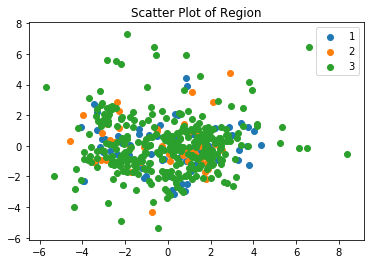

In [38]:
for i in np.unique(region):
    plt.scatter(data_pca[np.where(region==i)][:,0], data_pca[np.where(region==i)][:,1], label=i)
plt.title('Scatter Plot of Region')
plt.legend()
plt.show

### 既知のグループ・クラスタとの比較
- Channel
    - Channelの分類は[1,2]
    - 問題5でのクラスタリングと比較するとChannel1の分類とクラスタ2,3、Channel2の分類とクラスタ1,4が近い値を取っていることが確認できる。
- Region
    - Regionの分類は[1,2,3]
    - Region3の値にばらつきがあり、問題5でのクラスタリングとの比較が困難

## 【問題6】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。

### ヒント

前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。

条件ごとにデータを見る際にはPandasのgroupbyが便利です。

[pandas.DataFrame.groupby — pandas 0.23.4 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)


Attribute Information:

1)	FRESH: annual spending (m.u.) on fresh products (Continuous);   
2)	MILK: annual spending (m.u.) on milk products (Continuous);   
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);   
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)   
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)   
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);   
7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)   
8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)   

Descriptive Statistics: 

(Minimum, Maximum, Mean, Std. Deviation)   
FRESH (	3, 112151, 12000.30, 12647.329)   
MILK	(55, 73498, 5796.27, 7380.377)   
GROCERY	(3, 92780, 7951.28, 9503.163)   
FROZEN	(25, 60869, 3071.93, 4854.673)   
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)   
DELICATESSEN (3, 47943, 1524.87, 2820.106)   

REGION	Frequency   
Lisbon	77   
Oporto	47   
Other Region	316   
Total	440    

CHANNEL	Frequency   
Horeca	298   
Retail	142   
Total	440   
 

### データの確認

In [39]:
#データ情報を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [40]:
#要約統計量を表示
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 欠損値がないか確認

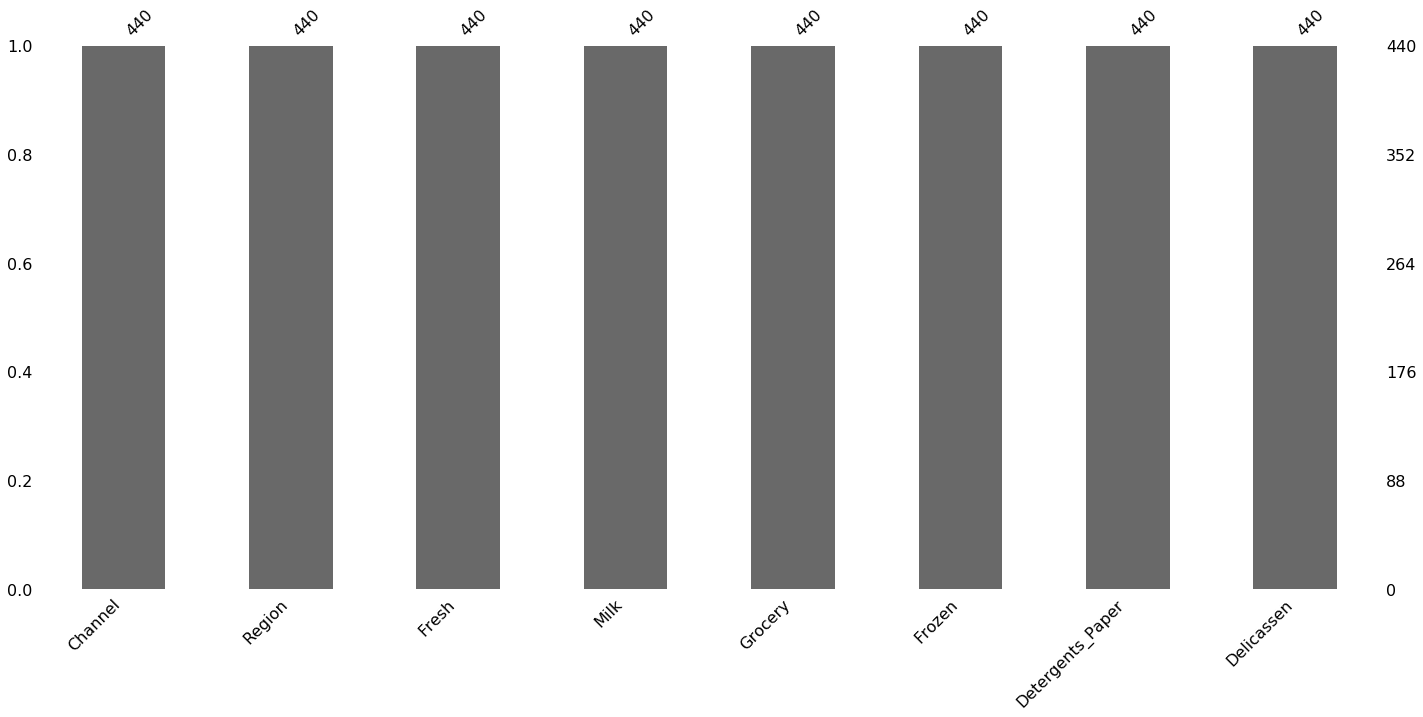

In [41]:
#missingnoモジュールのインポート
import missingno as msno

#欠損値の有無をバーとして表示
#バーが1.0に満たない特徴量に欠損値が発生していると確認できる
msno.bar(df)

### Channel別、Region別のデータ確認

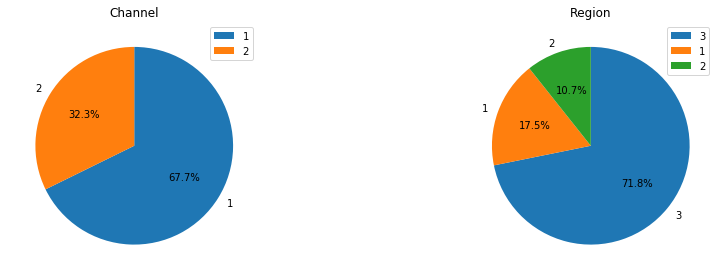

In [42]:
#グラフサイズ設定
fig = plt.figure(figsize=(15,10))

#一つ目のグラフ
ax = plt.subplot2grid((2,2), (0,0))

#円グラフ上のラベル設定
label = df.iloc[:,0].value_counts().index.values

#12時の一から時計回りに表示する
ax.pie(df.iloc[:,0].value_counts(),autopct="%1.1f%%", labels=label, startangle=90, counterclock=False)

# タイトル設定
plt.title("Channel")

#ラベル表示用
plt.legend()

#二つ目のグラフ
ax = plt.subplot2grid((2,2), (0,1))

#円グラフ上のラベル設定
label = df.iloc[:,1].value_counts().index.values

#12時の一から時計回りに表示する
ax.pie(df.iloc[:,1].value_counts(),autopct="%1.1f%%", labels=label, startangle=90, counterclock=False)

# タイトル設定
plt.title("Region")

#ラベル表示用
plt.legend()

plt.show()

In [43]:
#Channel区分別の平均
df.groupby(['Channel']).mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


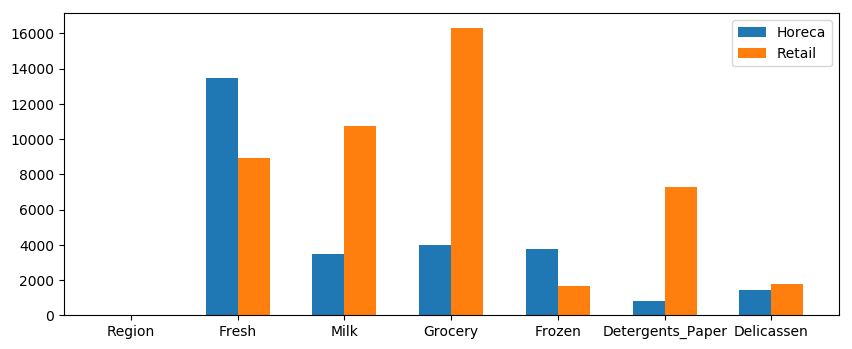

In [44]:
#Channel区分別の平均のグラフ表示

plt.figure(figsize=(10,4),dpi=100)

left = np.arange(df.groupby(['Channel']).mean().shape[1]) 
width = 0.3
labels = df.groupby(['Channel']).mean().columns.values

plt.bar(left, np.array(df.groupby(['Channel']).mean()[0:1]).reshape(-1), width=width, label="Horeca")
plt.bar(left+width, np.array(df.groupby(['Channel']).mean()[1:2]).reshape(-1), width=width, label="Retail")

plt.xticks(left + width/2, labels)
plt.legend()
plt.show()

In [45]:
#Region区分別の平均
df.groupby(['Region']).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


<function matplotlib.pyplot.show(*args, **kw)>

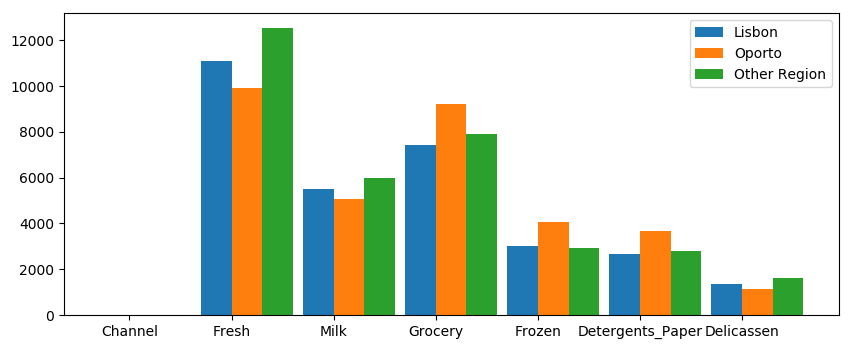

In [46]:
##Channel区分別の平均のグラフ表示
plt.figure(figsize=(10,4),dpi=100)

left = np.arange(df.groupby(['Region']).mean().shape[1]) 
width = 0.3
labels = df.groupby(['Region']).mean().columns.values

plt.bar(left, np.array(df.groupby(['Region']).mean()[0:1]).reshape(-1), width=width, label='Lisbon')
plt.bar(left+width, np.array(df.groupby(['Region']).mean()[1:2]).reshape(-1), width=width, label='Oporto')
plt.bar(left+width*2, np.array(df.groupby(['Region']).mean()[2:3]).reshape(-1), width=width, label='Other Region')

plt.xticks(left + width/2, labels)

plt.legend()

plt.show

In [47]:
#平均
df.groupby(['Channel', 'Region']).mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

### 相関関係を確認する

In [48]:
#相関係数行列を作成
corr_df = df.corr(method="pearson")
corr_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


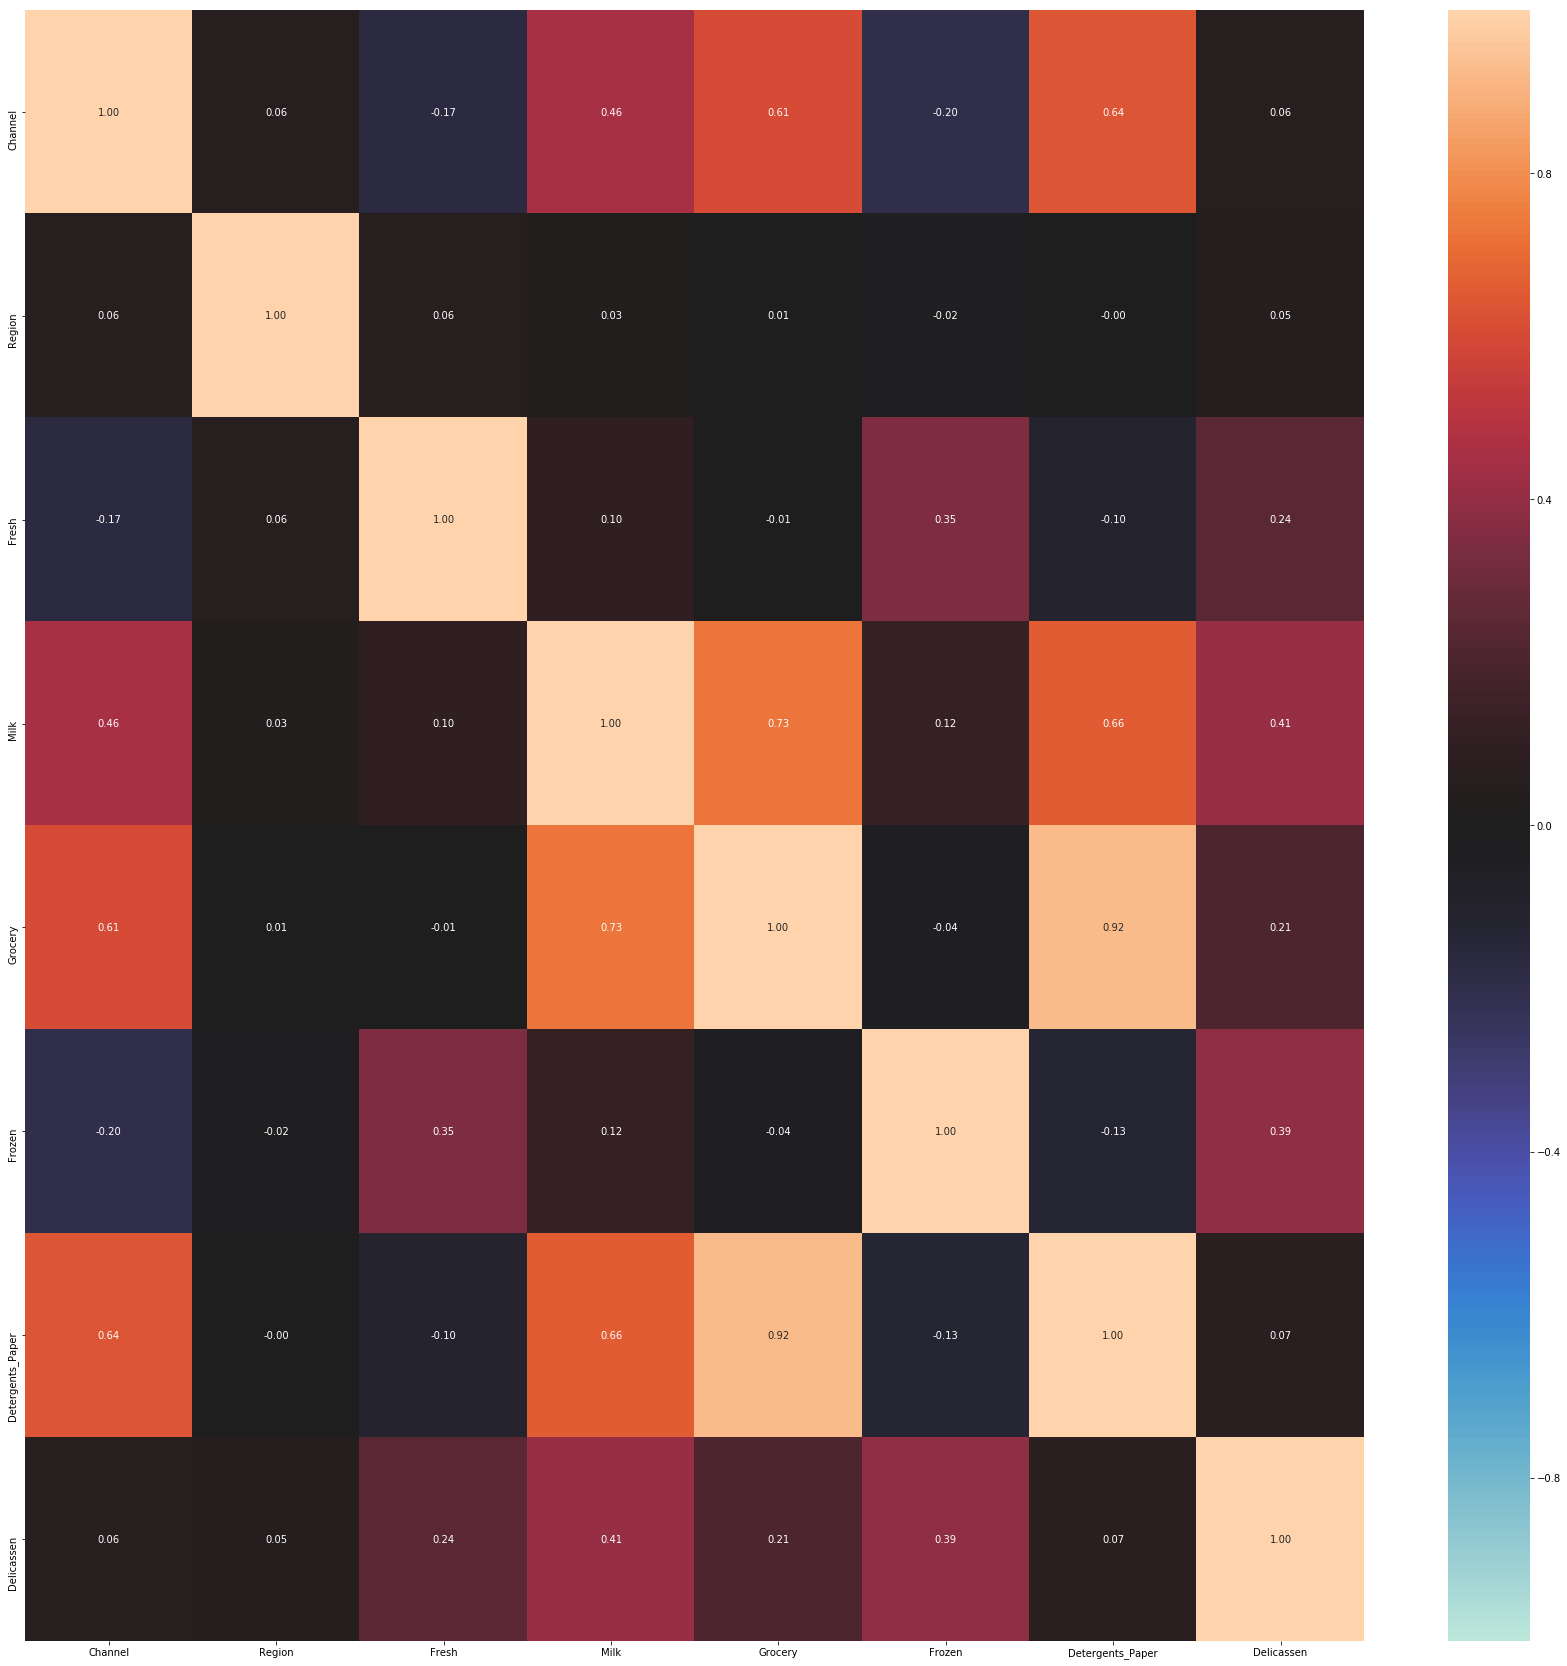

In [49]:
#図を拡大する
plt.figure(figsize=(30,30))

#ヒートマップを作成
sns.heatmap(corr_df,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.2f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values, 
           )

#出力
plt.show()

/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/yusuke-saruya/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/numpy/core/f

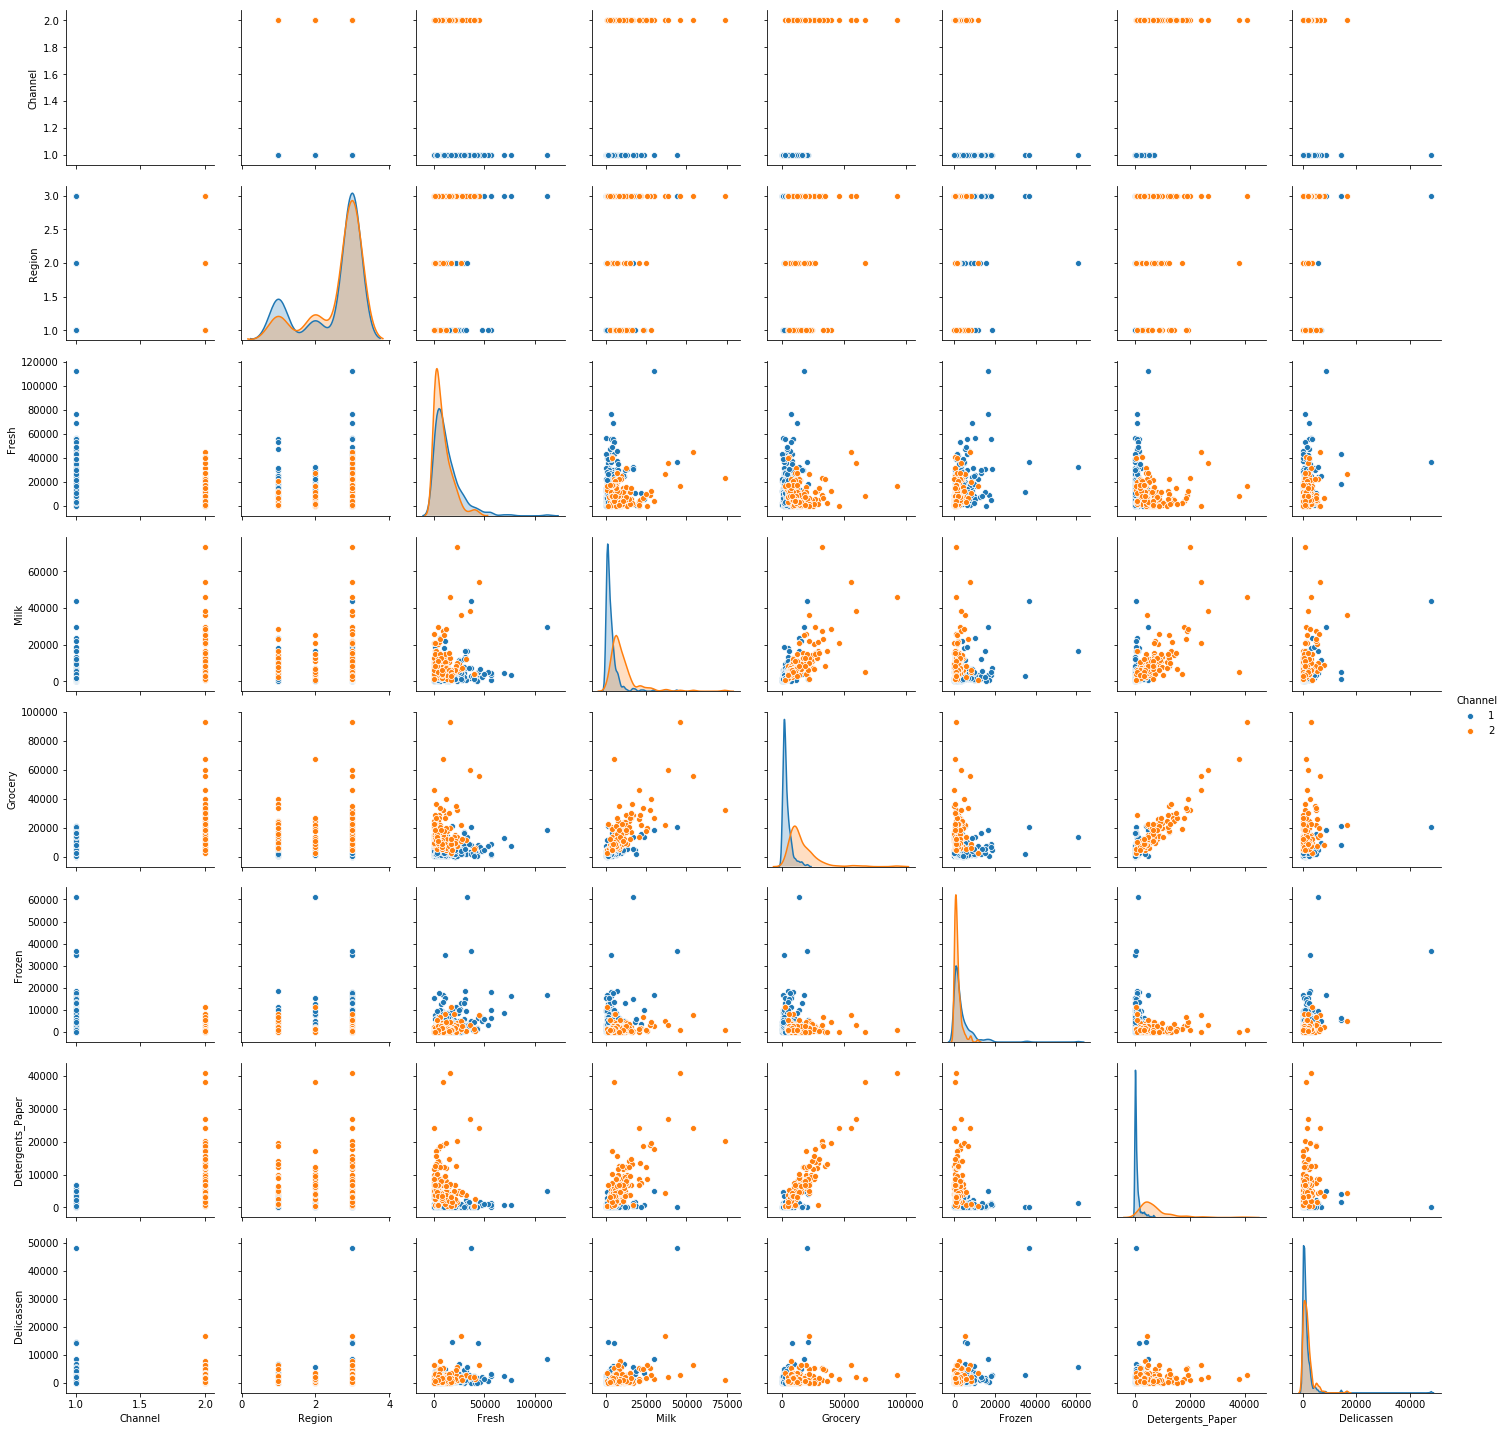

In [50]:
sns.pairplot(df, hue='Channel')

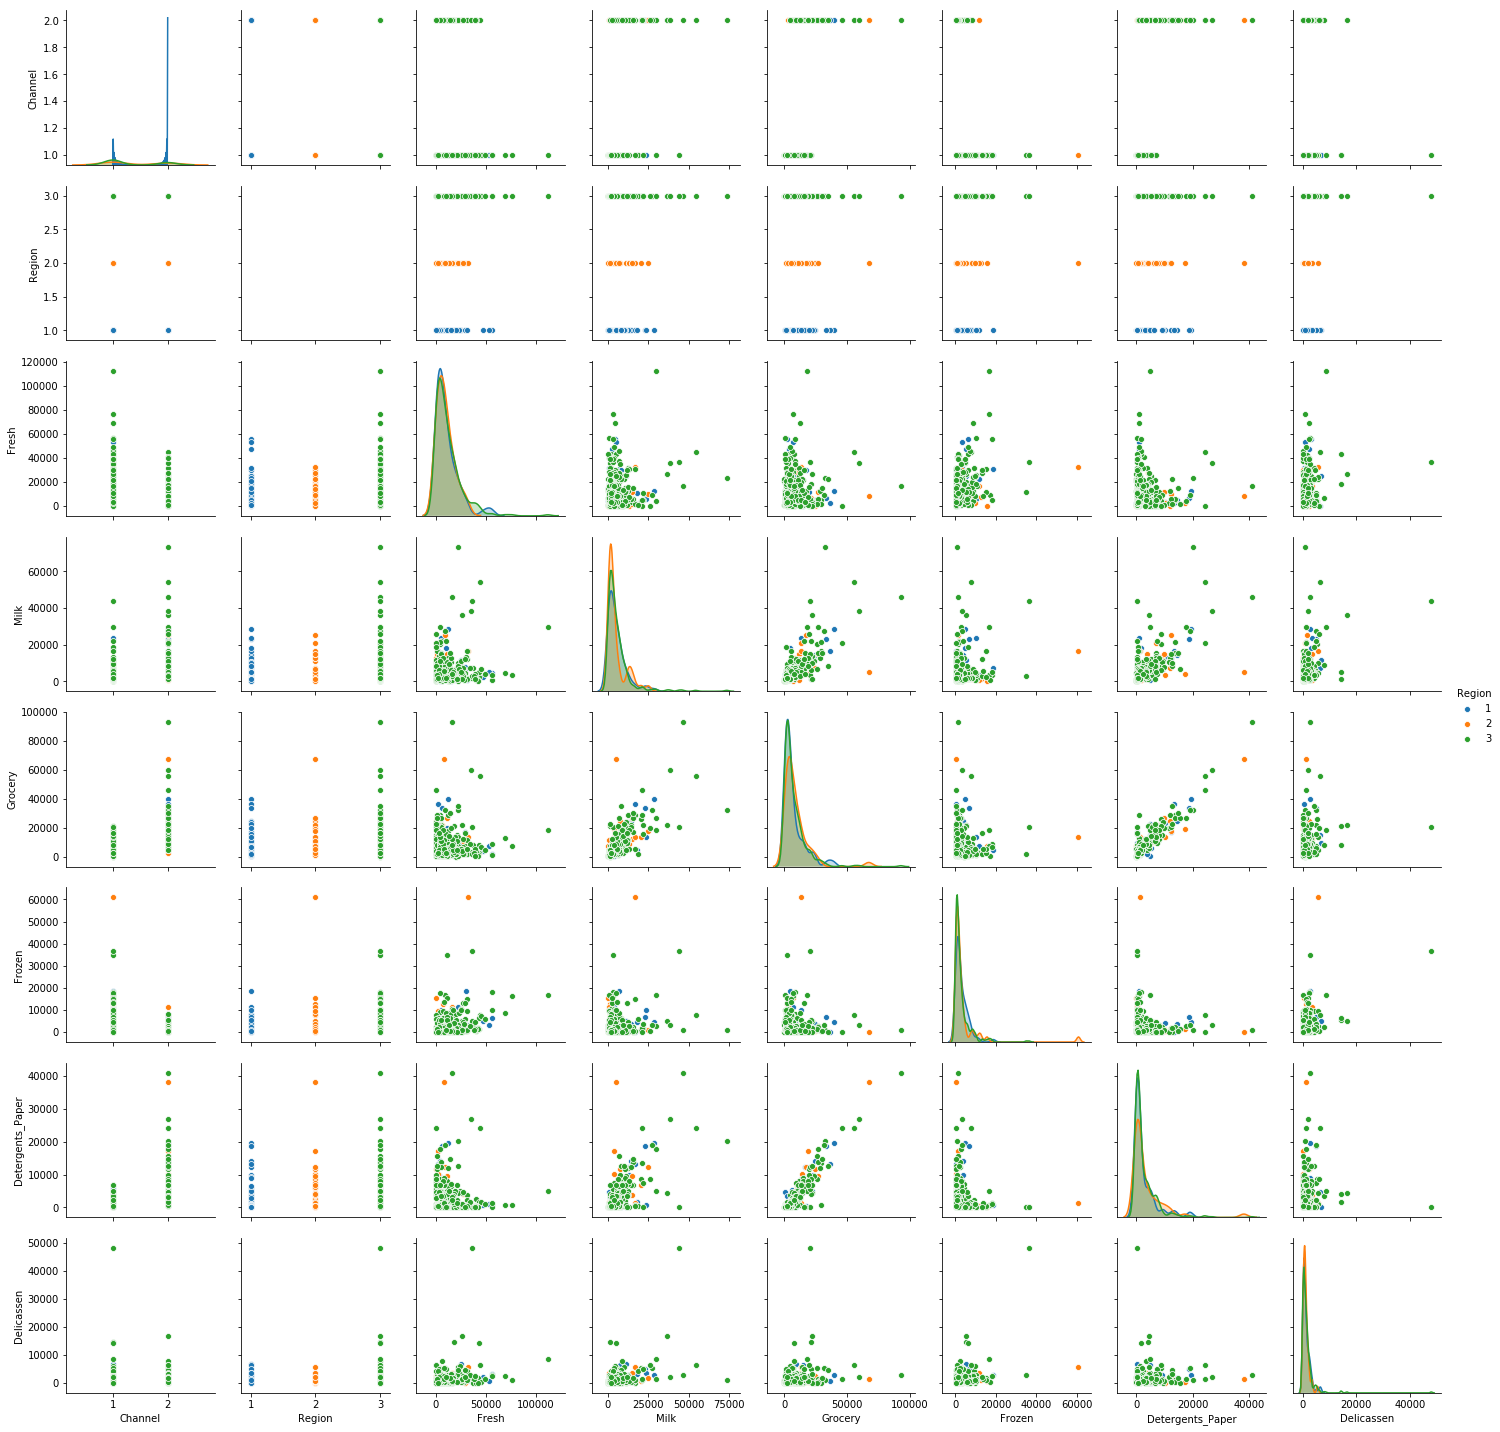

In [51]:
sns.pairplot(df, hue='Region')

### Channel別、Region別の相関係数を確認する

In [52]:
#Channel別のデータを作成
df_channel1 = df[df['Channel']==1].drop('Channel', axis=1)
df_channel2 = df[df['Channel']==2].drop('Channel', axis=1)

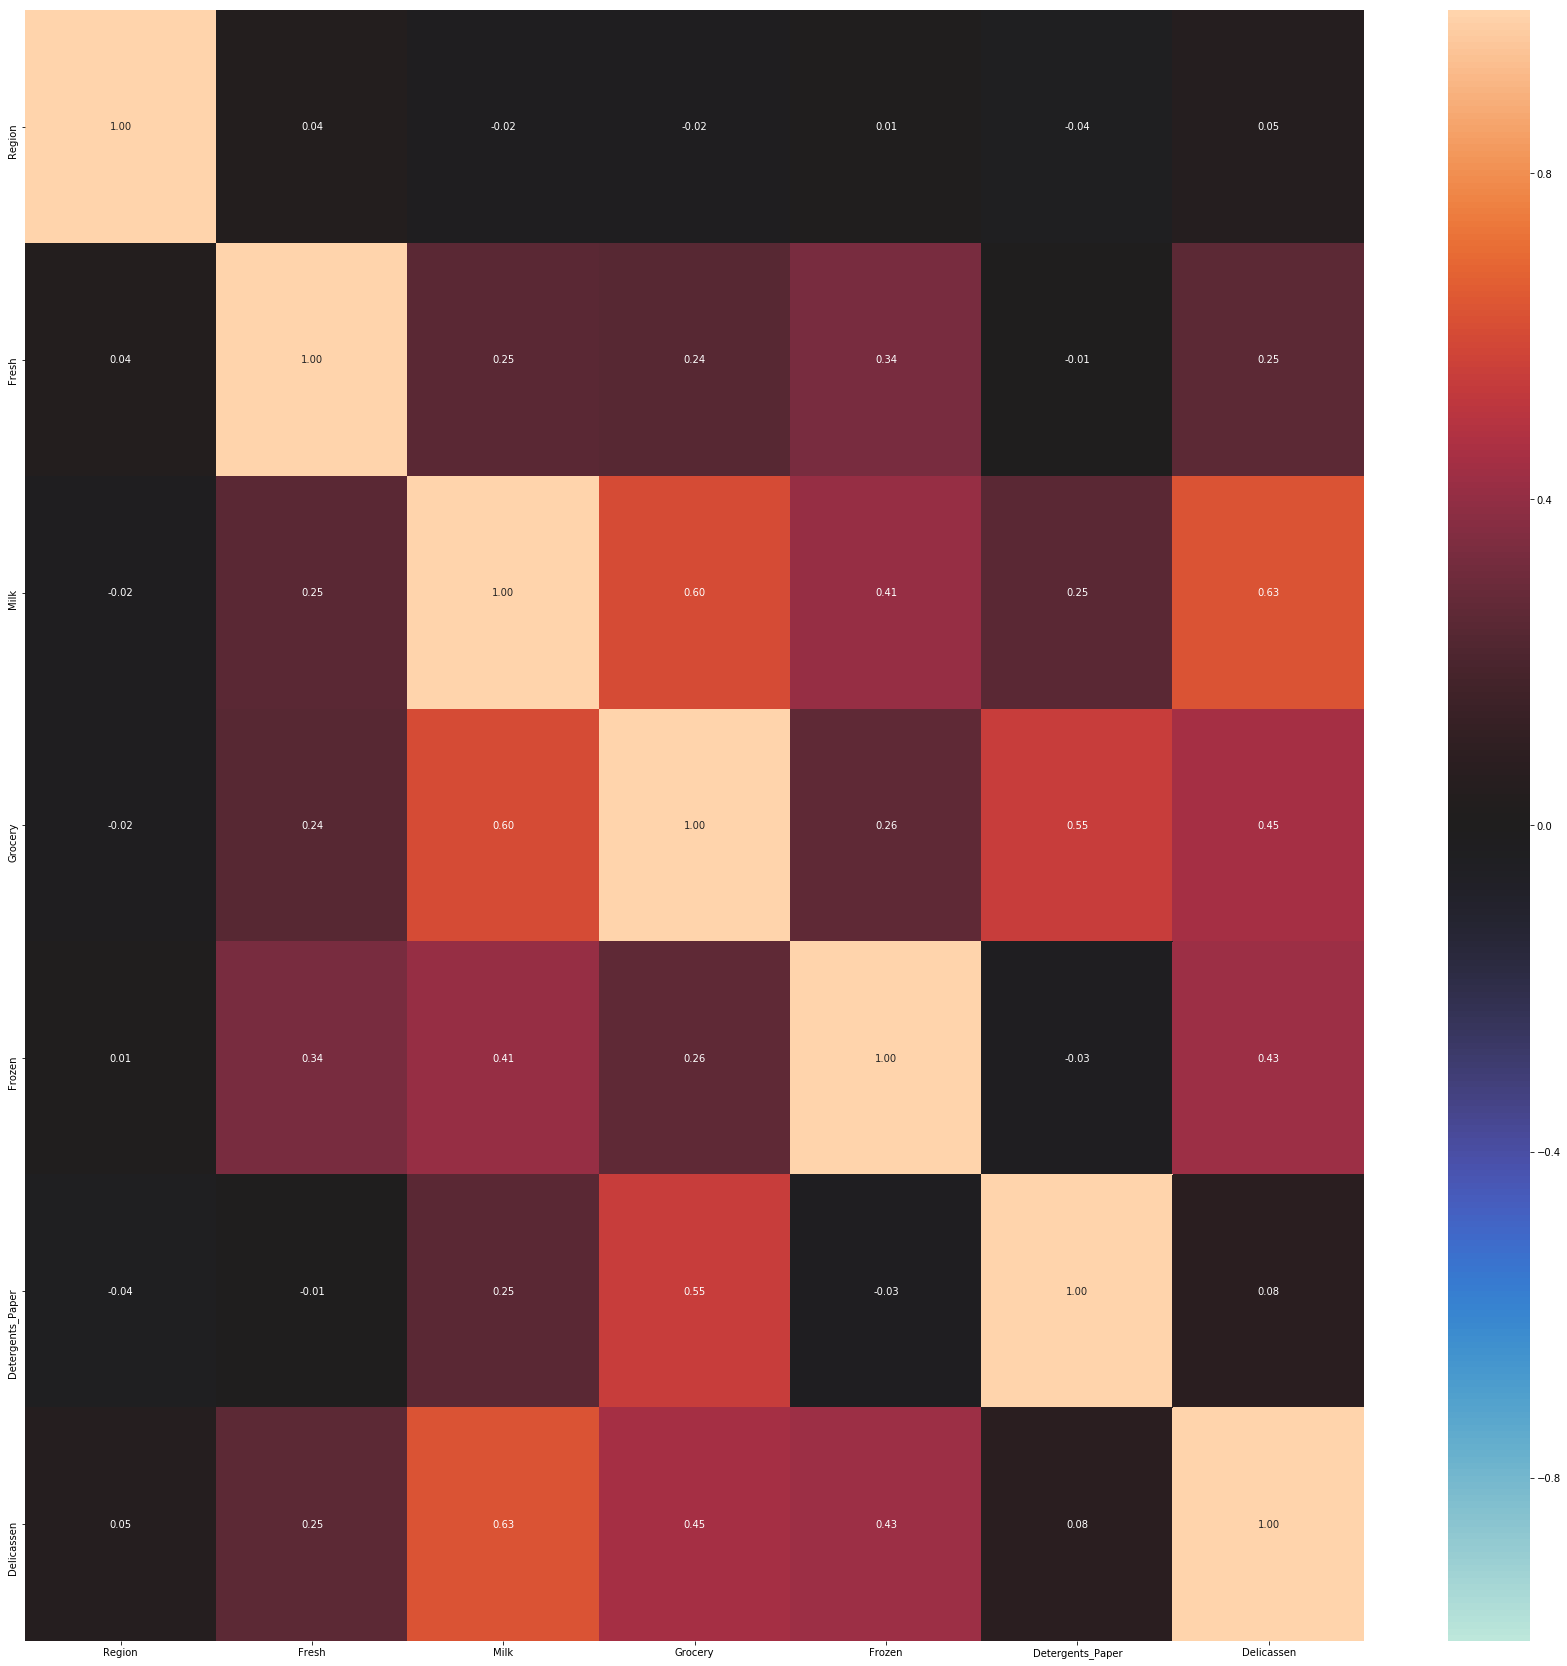

In [53]:
#相関係数行列を作成
corr_df_channel1 = df_channel1.corr(method="pearson")

#図を拡大する
plt.figure(figsize=(30,30))

#ヒートマップを作成
sns.heatmap(corr_df_channel1,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.2f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df_channel1.columns.values,
            yticklabels=corr_df_channel1.columns.values, 
           )

#出力
plt.show()

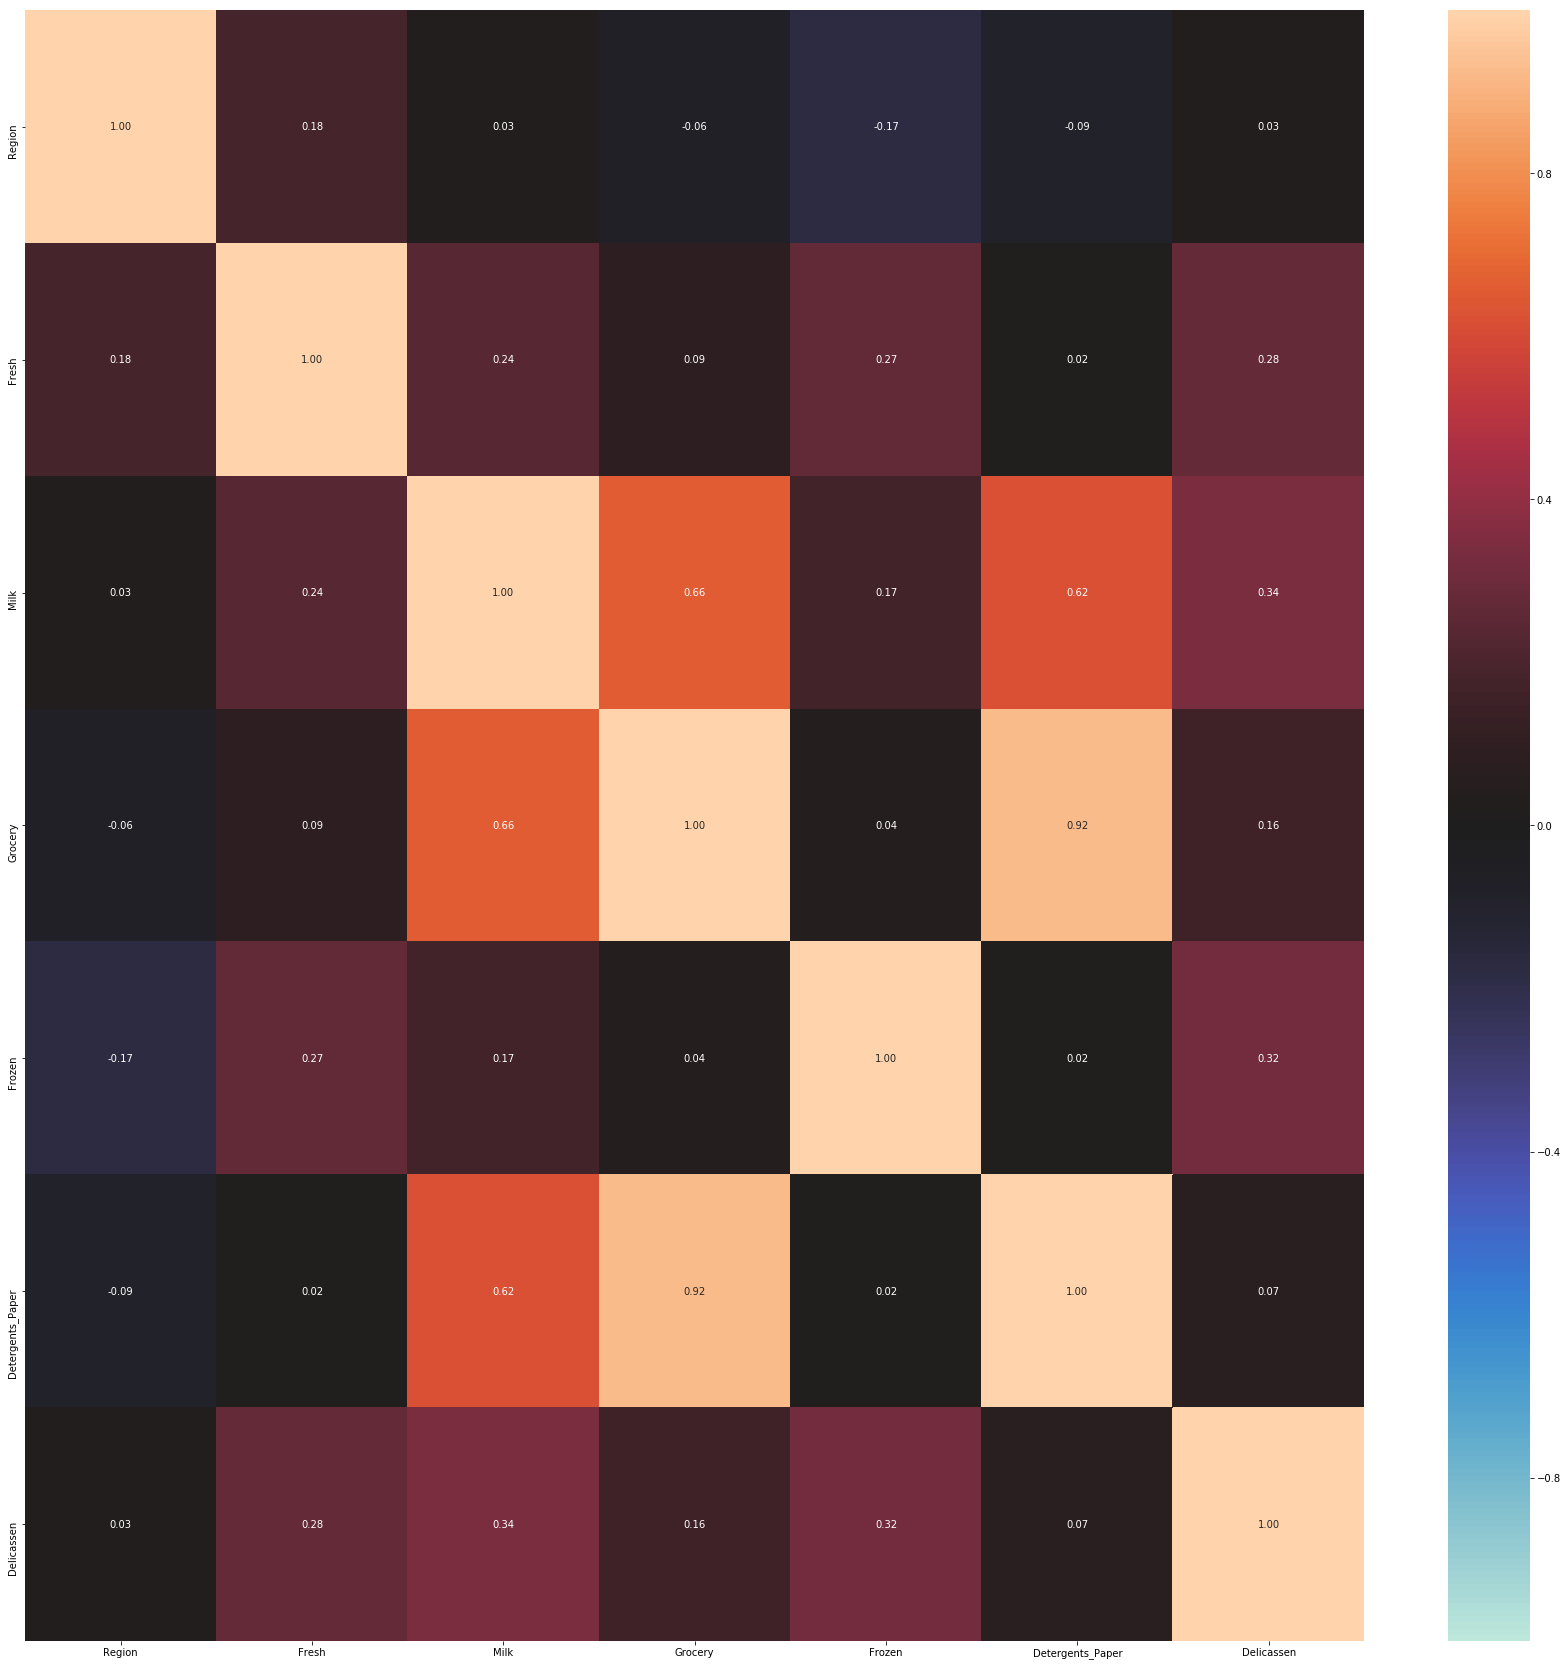

In [54]:
#相関係数行列を作成
corr_df_channel2 = df_channel2.corr(method="pearson")

#図を拡大する
plt.figure(figsize=(30,30))

#ヒートマップを作成
sns.heatmap(corr_df_channel2,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.2f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df_channel2.columns.values,
            yticklabels=corr_df_channel2.columns.values, 
           )

#出力
plt.show()

In [55]:
#Region別のデータを作成
df_region1 = df[df['Region']==1].drop('Region', axis=1)
df_region2 = df[df['Region']==2].drop('Region', axis=1)
df_region3 = df[df['Region']==3].drop('Region', axis=1)

#相関係数行列を作成
corr_df_region1 = df_region1.corr(method="pearson")

#相関係数行列を作成
corr_df_region2 = df_region2.corr(method="pearson")

#相関係数行列を作成
corr_df_region3 = df_region3.corr(method="pearson")


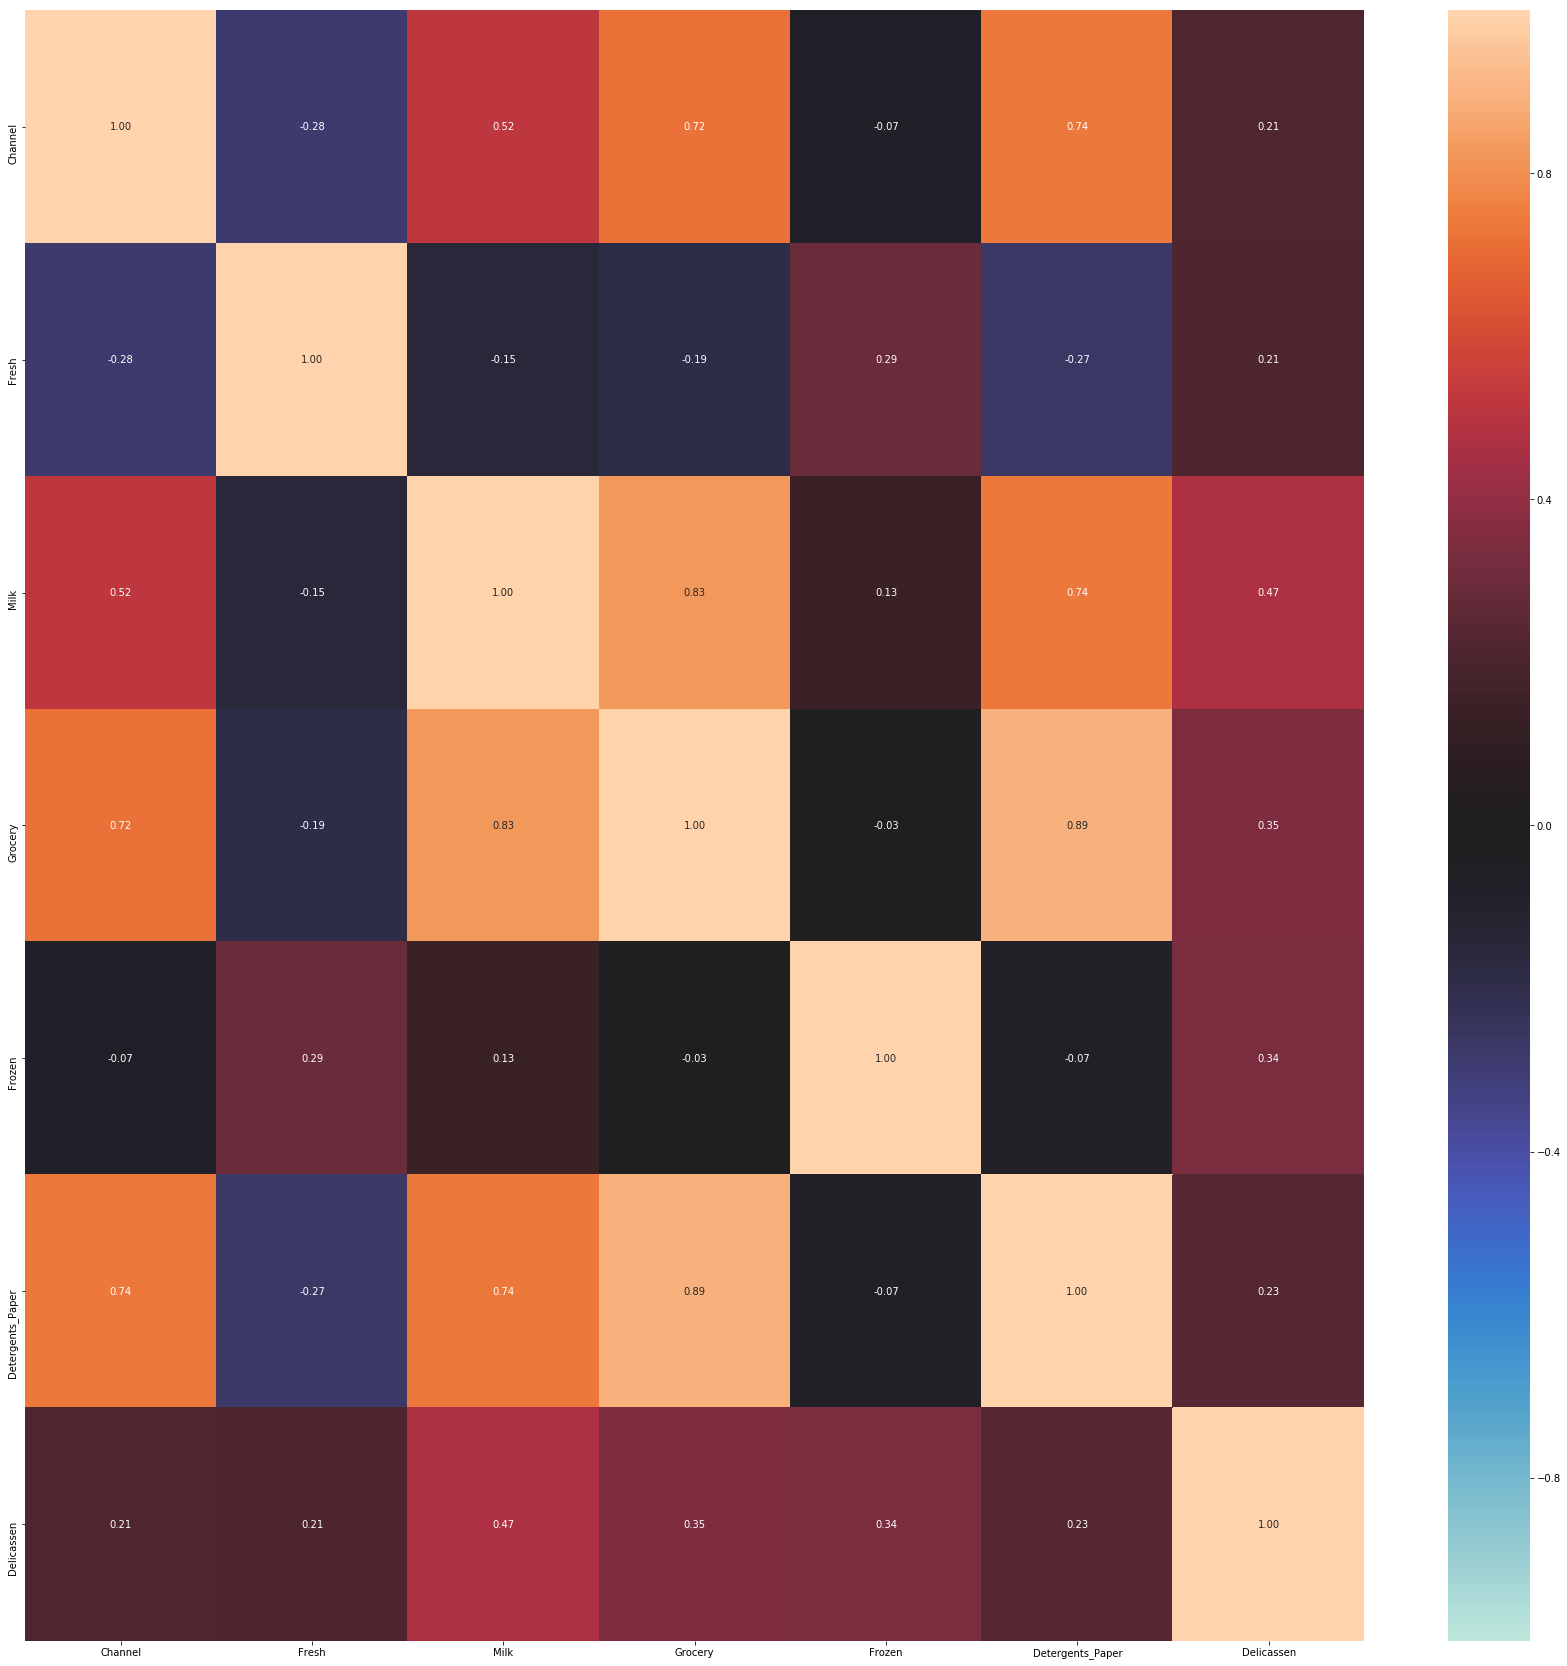

In [56]:
#図を拡大する
plt.figure(figsize=(30,30))

#ヒートマップを作成
sns.heatmap(corr_df_region1,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.2f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df_region1.columns.values,
            yticklabels=corr_df_region1.columns.values, 
           )

#出力
plt.show()

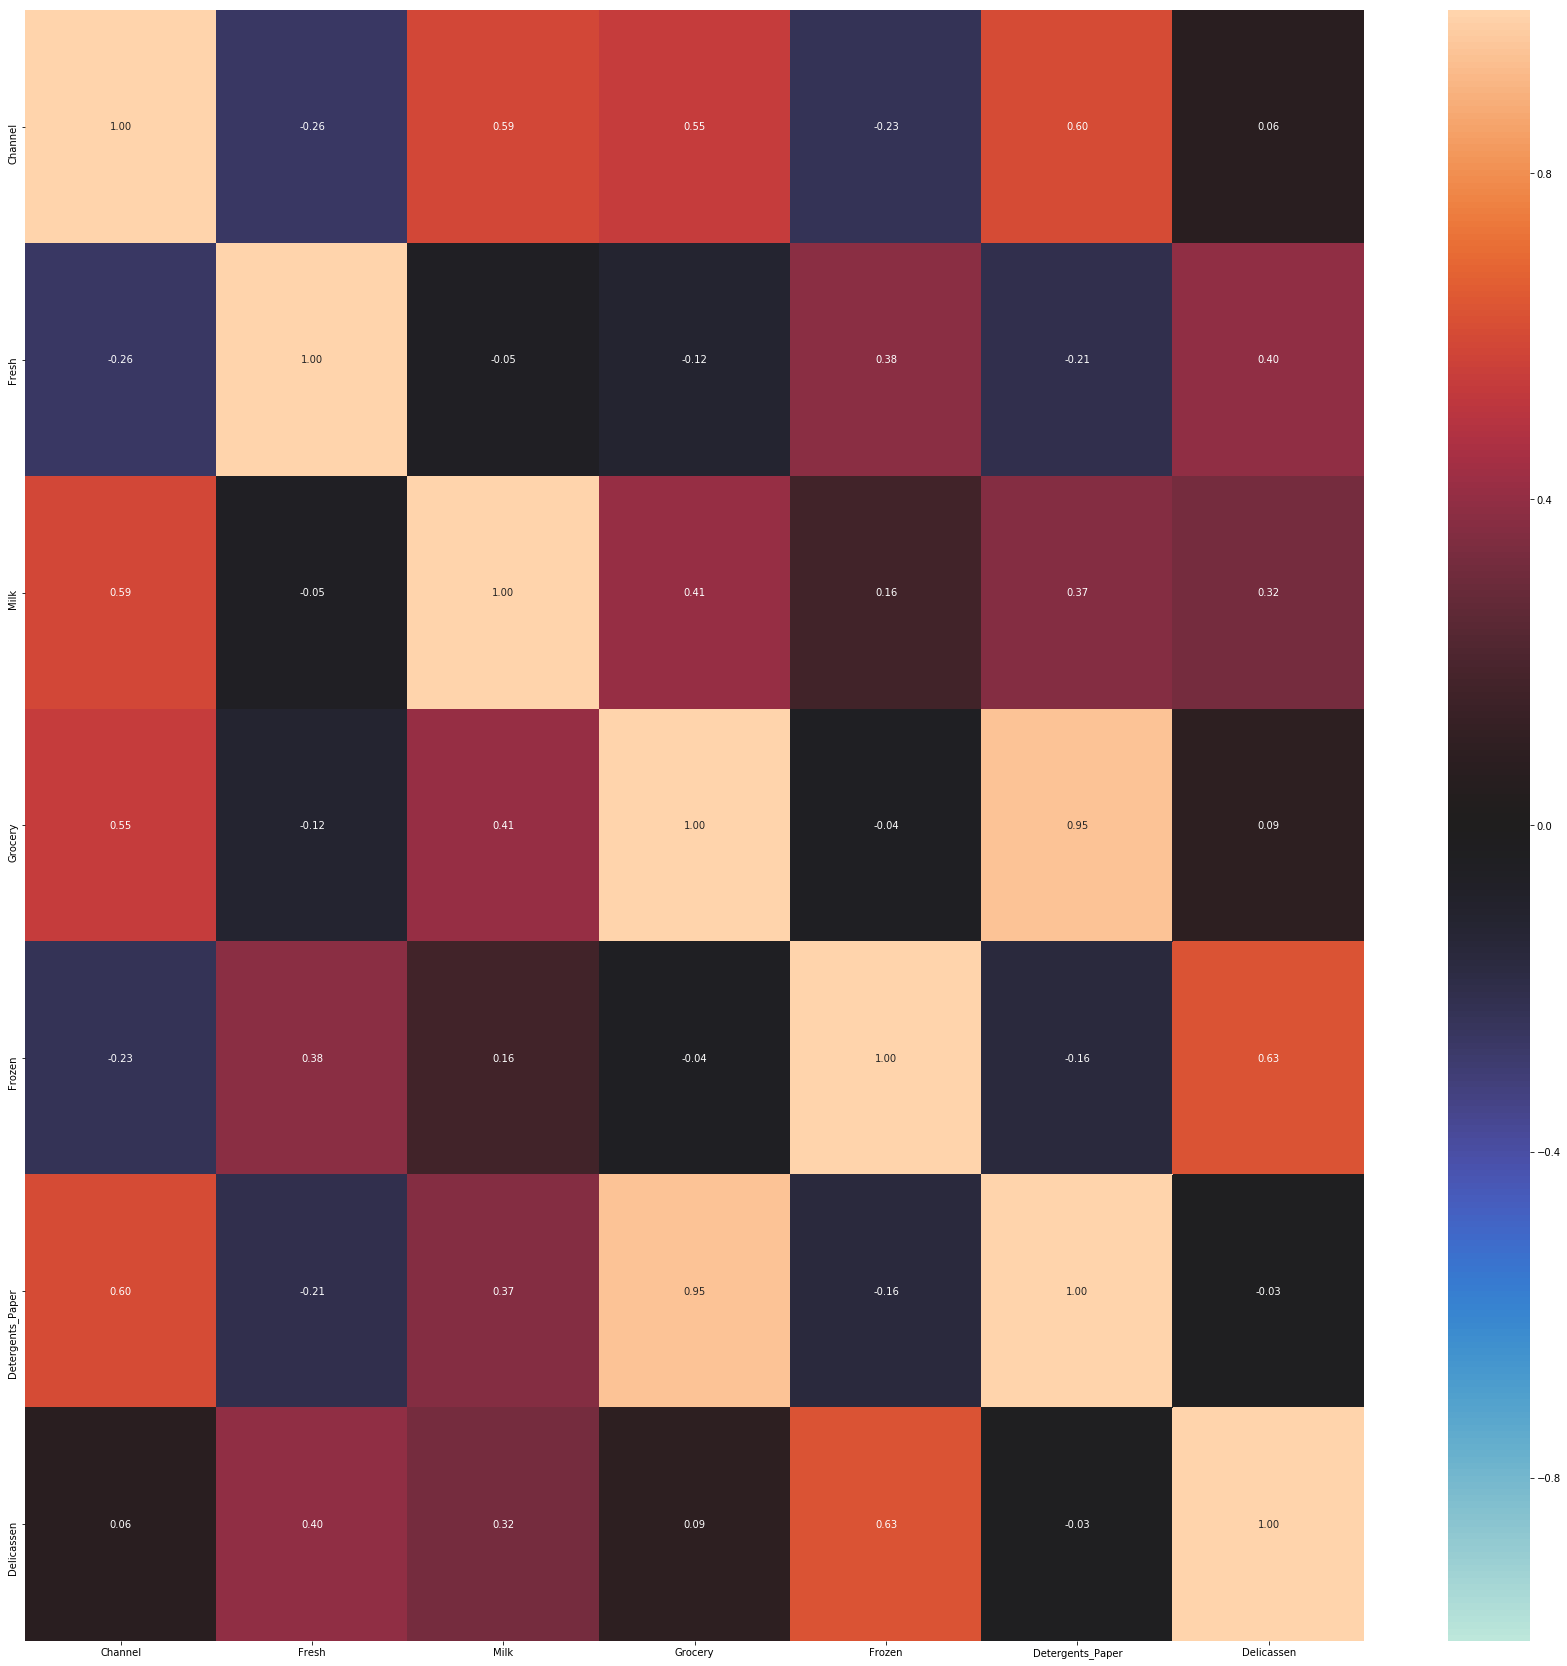

In [57]:
#図を拡大する
plt.figure(figsize=(30,30))

#ヒートマップを作成
sns.heatmap(corr_df_region2,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.2f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df_region2.columns.values,
            yticklabels=corr_df_region2.columns.values, 
           )

#出力
plt.show()

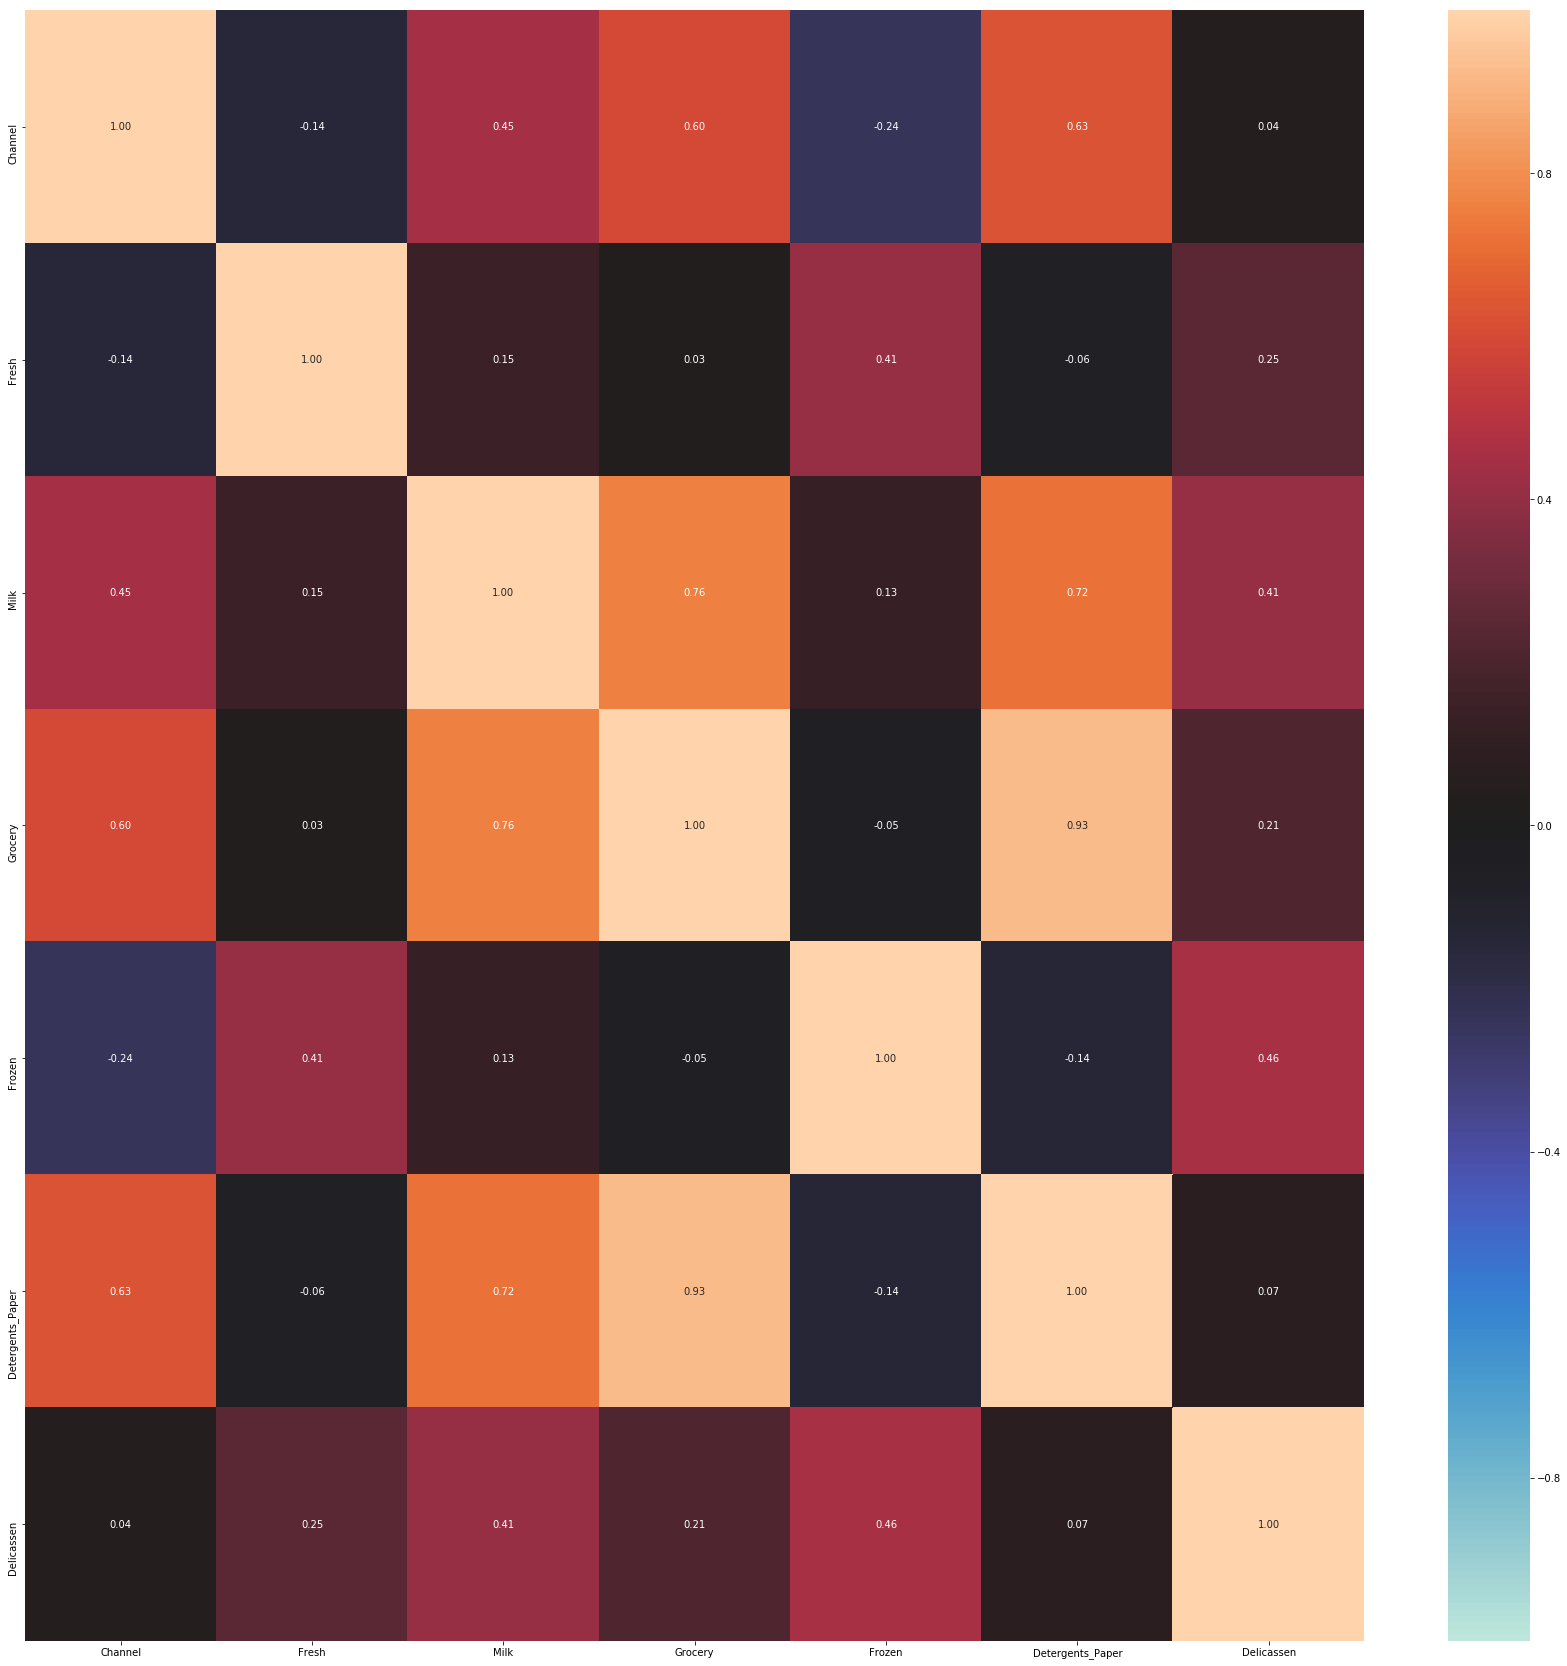

In [58]:
#図を拡大する
plt.figure(figsize=(30,30))

#ヒートマップを作成
sns.heatmap(corr_df_region3,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            fmt='.2f',
            annot=True, # True:格子の中に値を表示
            xticklabels=corr_df_region3.columns.values,
            yticklabels=corr_df_region3.columns.values, 
           )

#出力
plt.show()

## 【仮説】
### 新たな日用雑貨の商品を販売していきたい場合、どこの(region,channel)顧客に対して販促をかけるべきなのか

In [59]:
#相関関係の高い'Grocery', 'Detergents_Paper'にてクラスタリングを行う
data_prom = np.array(df[['Grocery', 'Detergents_Paper']])

In [60]:
#エルボー法によりクラスタ別のSSEを取得する
sse_list3 = np.array([])

for i in range(30):
    skm3_i = ScratchKMeans(n_cluster=i+1,n_init=10, max_iter=30, tol=1e-4)
    skm3_i.fit(data_prom)
    sse_list3 = np.append(sse_list3, skm3_i.SSE)
    
sse_list3

array([4.96256751e+10, 2.16215447e+10, 1.13908002e+10, 6.25193830e+09,
       4.59580276e+09, 3.62792050e+09, 3.31226765e+09, 3.17431403e+09,
       2.96204087e+09, 2.88205420e+09, 2.48507872e+09, 2.62784442e+09,
       2.47891824e+09, 2.43512270e+09, 2.20074389e+09, 2.46110432e+09,
       2.45320050e+09, 2.19205851e+09, 2.09738995e+09, 1.98318449e+09,
       1.25484824e+09, 1.92167021e+09, 2.09144036e+09, 1.83425927e+09,
       1.23639180e+09, 1.70895012e+09, 1.83792580e+09, 1.52534319e+09,
       9.38882229e+08, 1.94084029e+09])

<function matplotlib.pyplot.show(*args, **kw)>

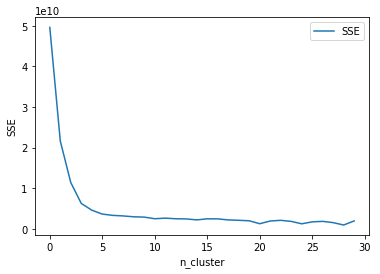

In [61]:
#グラフを表示する
plt.plot(sse_list3, label='SSE')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.legend()

plt.show

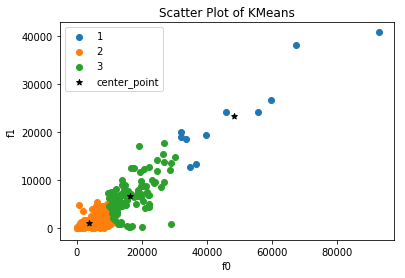

In [62]:
 #n_cluster=3にてクラスタリングを行う
skm_prom = ScratchKMeans(n_cluster=3)
skm_prom.fit(data_prom)
skm_prom.plot_scatter(data_prom)

上記より、クラスタ3に分類された顧客がどのregion,channelに属しているか確認する

In [63]:
#クラスタ3に分類された顧客データ(numpy)
cluster3_prom = np.array(df)[np.where(skm_prom.cluster==2)]
cluster3_prom

array([[     2,      3,   6006,  11093,  18881,   1159,   7425,   2098],
       [     2,      3,   3366,   5403,  12974,   4400,   5977,   1744],
       [     2,      3,  31714,  12319,  11757,    287,   3881,   2931],
       [     2,      3,  21217,   6208,  14982,   3095,   6707,    602],
       [     2,      3,  24653,   9465,  12091,    294,   5058,   2168],
       [     2,      3,   1020,   8816,  12121,    134,   4508,   1080],
       [     2,      3,  26373,  36423,  22019,   5154,   4337,  16523],
       [     2,      3,  22647,   9776,  13792,   2915,   4482,   5778],
       [     2,      3,   4113,  20484,  25957,   1158,   8604,   5206],
       [     1,      3,  18815,   3610,  11107,   1148,   2134,   2963],
       [     2,      3,    688,   5491,  11091,    833,   4239,    436],
       [     2,      3,  15168,  10556,  12477,   1920,   6506,    714],
       [     2,      3,   4591,  15729,  16709,     33,   6956,    433],
       [     2,      3,  10850,   7555,  14961,    

In [64]:
#channel別の顧客数を確認
collections.Counter(cluster3_prom[:,0])

Counter({2: 86, 1: 20})

In [65]:
#region別の顧客数を確認
collections.Counter(cluster3_prom[:,1])

Counter({3: 75, 1: 16, 2: 15})

### まとめ・提案
下記を中心に販促をかけることにより、販売効果を大きくすることができると考える。
1. Channel2(Retail), Region3(Other Region)
1. Channel2(Retail), Region1(Lisbon)またはRegion2(Oporto)

## 【問題7】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。

- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット  

について記述してください。



- DBSCAN
    - メリット
        - クラスタ数を設定しなくてよい
        - どのクラスタにも含まれていない外れ値を検出・識別できる。
    - デメリット
        - クラスタ間で密度が異なるようなデータの場合、期待通りのクラスタリングができない
        - K-meansより速度が遅い
        

- t-SNE
    - メリット
        - 非常に高次元データに対しても可視化することが可能
        - 多次元正規分布ではない非線形データに対しても利用可能
    - デメリット 
        - うまくいくことが保証されているのは2or3次元への圧縮のみ
        - 局所構造が次元の呪いの影響を受けやすい
        - 最適化アルゴリズムの収束性が保証されていない
- LLE
    - メリット
        - 非線形データに対して利用可能
        - 局所最適解に陥ることを回避できる
    - デメリット
        - ハイパーパラメータのクラスタ数を設定する必要がある
        


## 【問題8】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。

そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。

[sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

[sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

**パラメーターチューニング**

これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。

[t-SNEの論文](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

[DBSCANの論文](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)



In [66]:
# t-SNEによる次元削減
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(data)
X_embedded.shape

(440, 2)

In [67]:
#DBSCANによるクラスタリング
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=4, min_samples=15).fit(X_embedded)
clustering.labels_

np.unique(clustering.labels_)

array([-1,  0])

<function matplotlib.pyplot.show(*args, **kw)>

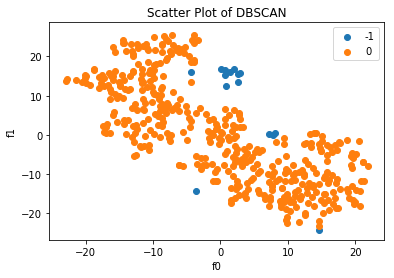

In [68]:
#散布図
for i in np.unique(clustering.labels_):
    plt.scatter(X_embedded[np.where(clustering.labels_==i)[0]][:, 0], X_embedded[np.where(clustering.labels_==i)[0]][:, 1], label=i)

plt.title('Scatter Plot of DBSCAN')
plt.xlabel('f0')
plt.ylabel('f1')
plt.legend()
plt.show

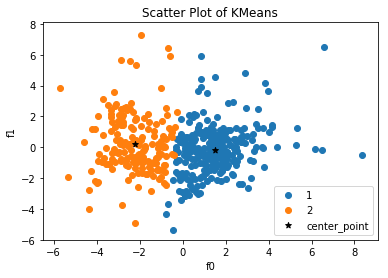

In [69]:
#Kmeansにて確認、比較
skm_2 = ScratchKMeans(n_cluster=2)
skm_2.fit(data_pca)
skm_2.plot_scatter(data_pca)

## まとめ
- t-SNE
    - PCAと比較すると、計算されたデータにおいてバラツキが大きい（中心によっていない）
- DBSCAN
    - クラスタを設定せずにクラスタリングを行うことができた
    - KMeansとは異なり、データ値の距離に関係なくクラスタリングが行われる
    - パラメータ(eps, min_samples)の設定が難しい